<h1>Proyecto "Forecasting de Abastecimiento de Equipos Móviles"</h1>

<img src='../resources/Fondo_Datathon_Entel.jpeg'></img>



<p>Desarrollado por:<b> Insight ML</b></p>


<div>
    <b>Integrantes</b> 
    <ul>
        <li>Renato Castro Cruz</li>
        <li>Cristian Lazo Quispe</li>
    </ul>
</div>


<div><b>Descripción del reto</b></div>

<div>
    <p>El reto consiste en desarrollar un algoritmo que prediga la demanda de un modelo en un punto de venta de acuerdo a su gama semanalmente, sin usar herramientas, aplicaciones y/o API de paga y además de no generar gastos. <b>Esto es una restricción muy importante</b></p>
</div>


<div><b>Descripción del dataset</b></div>
<div>
    Se va a predecir a nivel de semana y se tiene los siguientes archivos:

<div>Files
    <ul>
        <li>train.csv - Data de entrenamiento. Desde la semana 1 (17/05/2021-23/05/2021) hasta la semana 50 (25/04/2022- 1/05/2022)</li>
        <li>test.csv - Data de test. Desde la semana 51 (2/05/2022-8/05/2022) hasta la semana 60 (4/07/2022-10/07/2022)</li>
        <li>test_sample.csv - Un ejemplo de submission en el formato correcto</li>
    </ul>
</div>
    
    
<div>ColumnsColumns
    <ul>
        <li>Z_MARCA - Marca del equipoZ_MARCA - Marca del equipo</li>
        <li>Z_GAMA - Gama del equipoZ_GAMA - Gama del equipo</li>
        <li>Z_MODELO - ModeloZ_MODELO - Modelo</li>
        <li>Z_DEPARTAMENTO - Departamento del Perú del punto de venta</li>
        <li>Z_PUNTO_VENTA - Punto de venta a abastecer</li>
        <li>SEMANA_XX - Semana de abastecimiento de acuerdo con el modelo, punto de venta y gama</li>
    </ul>
</div>
    
<div><b>Target</b></div>

<div>
    <p>Se pide determinar la demanda semanal de un modelo en un punto de venta de acuerdo a su gama.</p>
</div>

<div><b>Evaluación</b></div>

<div>
    <p>Se evaluará a los participantes en función del RMSE, de menor a mayor. Durante la competencia se reportarán resultados sobre un subconjunto del set de evaluación (50%), pero los resultados finales se calcularán sobre los datos restantes (50%)</p>
</div>

<div><b>Formato del Kaggle Submission</b></div>

<div>
    <p>Para todos los participantes, los archivos subidos deberán tener las siguientes columnas: ID yDemanda. Tener en cuenta que el valor de "Demanda" hace referencia al valor forecasteado. Al mismo tiempo, la estructura de la variable "ID" es Modelo|Punto de venta|Gama|# Semana.</p>
</div>

<div>   
El formato del archivo será el siguiente:

<pre><code>ID,Demanda
XXXX|PDV1|XXXX|Semana 55,1
XXXX|PDV1|XXXX|Semana 56,2
XXXX|PDV1|XXXX|Semana 57,3
</code></pre>

</div>
<p></p>
<div>
    <b>Lenguajes de Programación, Librerías, Frameworks a usar</b>
</div>
<p></p>
<div>
    Lenguajes de Programación:
    <ul>
        <li><a href='https://www.anaconda.com/'>Anaconda - Python</a></li>
        <li><a href='https://www.javascript.com/'>Javascript</a></li>
    </ul>
</div>

<div>
    Frameworks y librerías:
    <ul>
        <li><a href='https://scikit-learn.org/stable/'>Scikit-learn</a>, <a href='https://pandas.pydata.org/'>Pandas</a>, <a href='https://numpy.org/'>Numpy</a></li>
        <li><a href='https://lightgbm.readthedocs.io/en/latest/index.html'>LightGBM</a>, <a href='https://xgboost.ai/'>XgBoost</a>, <a href='https://catboost.ai/'>CatBoost</a></li>
        <li><a href='http://seaborn.pydata.org/'>Seaborn</a>, <a href='https://plotly.com/python/'>Plotly</a></li>
        <li><a href='https://facebook.github.io/prophet/'>Prophet</a></li>
        <li><a href='https://pytorch.org/'>PyTorch</a></li>
    </ul>
</div>


<div><b>Recursos que nos ayudaron en el desarrollo del proyecto:</b></div>

<div>
    Kaggle Competitions:
    <ul>
        <li><a href='https://www.kaggle.com/competitions/m5-forecasting-accuracy'>M5 Forecasting Accuracy 2020</a></li>
        <li><a href='https://www.kaggle.com/competitions/store-sales-time-series-forecasting'>Store Sales - Time Series Forecasting</a></li>
    </ul>
</div>

<div>
    Videos:
    <ul>
        <li><a href='https://www.youtube.com/watch?v=VYpAodcdFfA'>Two Effective Algorithms for Time Series Forecasting</a></li>
        <li><a href='https://www.youtube.com/watch?v=pOYAXv15r3A'>Forecasting at Scale: How and Why We Developed Prophet for Forecasting at Facebook</a></li>
    </ul>
</div>

<h2>Lectura de Librerías</h2>

In [157]:
### Data Science Libraries ###
import pandas as pd # Librería de manipulación de data tabular
import numpy as np # Librería de operaciones matriciales
import seaborn as sns # Librería de Data Visualization
import matplotlib.pyplot as plt # Librería de Data Visualization
import plotly.express as px # Librería avanzada de Data Visualizatión Dinámico
from statsmodels.tsa.stattools import acf # Librería de Estadística

### Machine Learning Libraries ###
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import catboost as cb
#import lightgbm as lgbm
#import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet

### OS and other Libraries ###
import inspect # Librería que permite listar variables del kernel presente
import os # Librería para realizar comandos de sistema operativo
import datetime # Librería para manejar clases de tiempo y fechas
import warnings # Librería para ignorar warnings
warnings.filterwarnings("ignore") #Ignoraremos cualquier warning con esta librería
import random # Librería para generar número(s) random
import pickle # Librería para leer archivos pickle
import utils_entel # Funciones del archivo utils_entel.py que nos ayudará con nuestro preprocessing

In [4]:
train = pd.read_csv('../dataset/train/train_converted.csv') # Lectura del output train del notebook Preprocessing
test = pd.read_csv('../dataset/test/test_converted.csv') # Lectura del output test del notebook Preprocessing

In [5]:
descriptive_columns = ['Z_MARCA', 'Z_GAMA', 'Z_MODELO',
                       'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA'] # Tener en cuenta nuestras variables descriptivas

<h2>Exploratory Data Analysis</h2>

Realizamos descripción del dataset así como un análisis de estadísticos de todas las variables sean categóricas o numéricas

In [9]:
train.head(5)

Z_MARCA Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  Demanda  \
0   MAR_5  GAM_3  MOD_318         DEP_12      PVENT_26  SEMANA_01        0   
1   MAR_3  GAM_1  MOD_305          DEP_1     PVENT_212  SEMANA_01        0   
2   MAR_5  GAM_3  MOD_246          DEP_1     PVENT_169  SEMANA_01        1   
3   MAR_1  GAM_4  MOD_286          DEP_1     PVENT_161  SEMANA_01        0   
4   MAR_6  GAM_4  MOD_282          DEP_1      PVENT_69  SEMANA_01        0   

  Z_WEEK_DATE  Z_DAY  Z_MONTH  Z_YEAR  
0  2021-05-17     17        5    2021  
1  2021-05-17     17        5    2021  
2  2021-05-17     17        5    2021  
3  2021-05-17     17        5    2021  
4  2021-05-17     17        5    2021

In [7]:
train.describe(include='all')

Z_MARCA   Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  \
count   2358650  2358650  2358650        2358650       2358650    2358650   
unique       17        7      318             25           486         50   
top       MAR_1    GAM_1    MOD_1          DEP_1       PVENT_1  SEMANA_01   
freq     594400  1039250    24050        1023750         12400      47173   
mean        NaN      NaN      NaN            NaN           NaN        NaN   
std         NaN      NaN      NaN            NaN           NaN        NaN   
min         NaN      NaN      NaN            NaN           NaN        NaN   
25%         NaN      NaN      NaN            NaN           NaN        NaN   
50%         NaN      NaN      NaN            NaN           NaN        NaN   
75%         NaN      NaN      NaN            NaN           NaN        NaN   
max         NaN      NaN      NaN            NaN           NaN        NaN   

             Demanda Z_WEEK_DATE         Z_DAY       Z_MONTH        Z_YEAR  
count   2.358650e+06     2358650  2.358650e+06  2.358650e+06  2.358650e+06  
unique           NaN          50           NaN           NaN           NaN  
top              NaN  2021-05-17           NaN           NaN           NaN  
freq             NaN       47173           NaN           NaN           NaN  
mean    7.622398e-01         NaN  1.664000e+01  6.540000e+00  2.021340e+03  
std     5.983817e+00         NaN  8.668935e+00  3.528230e+00  4.737089e-01  
min     0.000000e+00         NaN  1.000000e+00  1.000000e+00  2.021000e+03  
25%     0.000000e+00         NaN  9.000000e+00  3.000000e+00  2.021000e+03  
50%     0.000000e+00         NaN  1.700000e+01  7.000000e+00  2.021000e+03  
75%     0.000000e+00         NaN  2.400000e+01  1.000000e+01  2.022000e+03  
max     1.451000e+03         NaN  3.100000e+01  1.200000e+01  2.022000e+03

In [8]:
test.describe(include='all')

Z_MARCA  Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  \
count   471730  471730   471730         471730        471730     471730   
unique      17       7      318             25           486         10   
top      MAR_1   GAM_1    MOD_1          DEP_1       PVENT_1  SEMANA_51   
freq    118880  207850     4810         204750          2480      47173   
mean       NaN     NaN      NaN            NaN           NaN        NaN   
std        NaN     NaN      NaN            NaN           NaN        NaN   
min        NaN     NaN      NaN            NaN           NaN        NaN   
25%        NaN     NaN      NaN            NaN           NaN        NaN   
50%        NaN     NaN      NaN            NaN           NaN        NaN   
75%        NaN     NaN      NaN            NaN           NaN        NaN   
max        NaN     NaN      NaN            NaN           NaN        NaN   

        Demanda Z_WEEK_DATE          Z_DAY        Z_MONTH    Z_YEAR  
count       0.0      471730  471730.000000  471730.000000  471730.0  
unique      NaN          10            NaN            NaN       NaN  
top         NaN  2022-05-02            NaN            NaN       NaN  
freq        NaN       47173            NaN            NaN       NaN  
mean        NaN         NaN      15.000000       5.600000    2022.0  
std         NaN         NaN       9.327389       0.663326       0.0  
min         NaN         NaN       2.000000       5.000000    2022.0  
25%         NaN         NaN       6.000000       5.000000    2022.0  
50%         NaN         NaN      14.500000       5.500000    2022.0  
75%         NaN         NaN      23.000000       6.000000    2022.0  
max         NaN         NaN      30.000000       7.000000    2022.0

Nos damos cuenta que la demanda en el train dataset casi el 75 % es 0. Es más veremos cuanto es la proporción de los registros que tienen como valor 0.

In [14]:
train[train['Demanda']==0].shape[0]*100/train.shape[0] 
# Casi el 83 % de los registros tienen como valor 0. 
#Es un buen dato para tener en cuenta un posible data leakage para validar el modelo-

83.5063277722426

<AxesSubplot:xlabel='Demanda', ylabel='Density'>

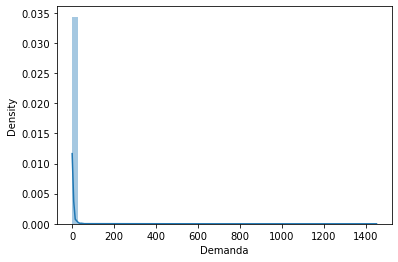

In [15]:
sns.distplot(train.Demanda) # Realizamos un distplot para ver gráficamente estos casos de 0 siendo predominantes en todo el train dataset.

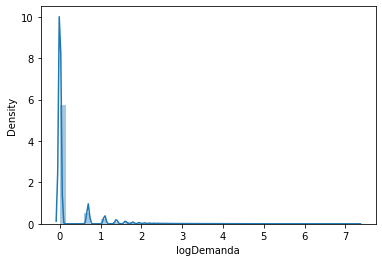

In [16]:
# Al ser un problema de regresión, siempre es bueno ver si una transformación a logaritmos ayudaría para la predicción.
# Según bibliografía, esta transformación siempre se aplica cuando haya valores muy grandes. Sin embargo en este caso no ayudaría para nada.
train['logDemanda'] = np.log1p(train['Demanda'])
sns.distplot(train['logDemanda'] )
train.drop('logDemanda', axis = 1, inplace = True)

<h2>Data Visualization</h2>

La visualización nos permitirá entender las distribuciones de la demanda por cada variable descriptiva (revisar descriptive_columns list). La idea es ver si se puede encontrar un patrón por el tiempo. Así mismo quitar semanas outliers que no sean adecuados para la proyección. (Por ejemplo en varios retos se omite Diciembre por ser temporada navideña y fiestas).

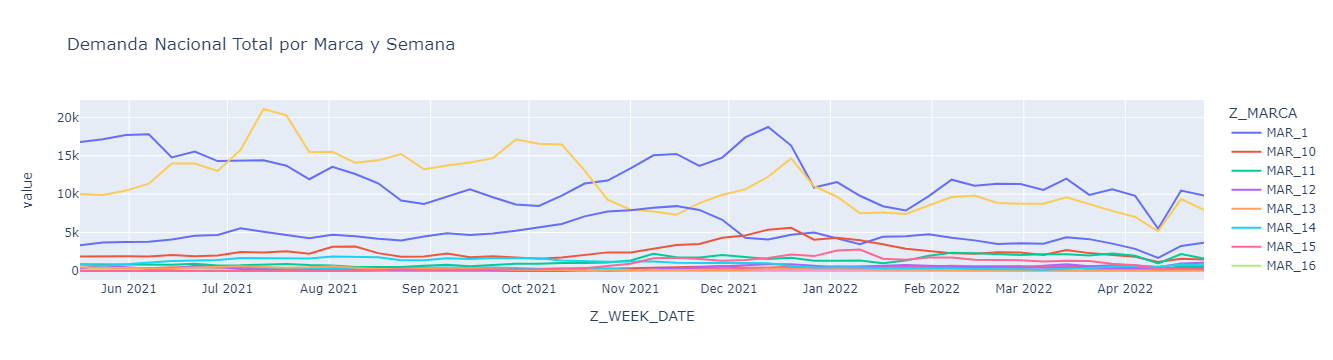

In [41]:
aux = train[['Z_MARCA', 'Demanda', 'Z_WEEK_DATE']].groupby(['Z_MARCA', 'Z_WEEK_DATE']).sum()
aux = aux[aux['Demanda'].notna()].reset_index()

aux_ = pd.pivot_table(aux, index = 'Z_WEEK_DATE', values='Demanda', columns='Z_MARCA').reset_index()


fig = px.line(aux_, x='Z_WEEK_DATE', y=aux_.columns,
              hover_data={'Z_WEEK_DATE': "|%B %d, %Y"},
              title='Demanda Nacional Total por Marca y Semana')
fig.update_xaxes(
    dtick="M1",
)
fig.show()

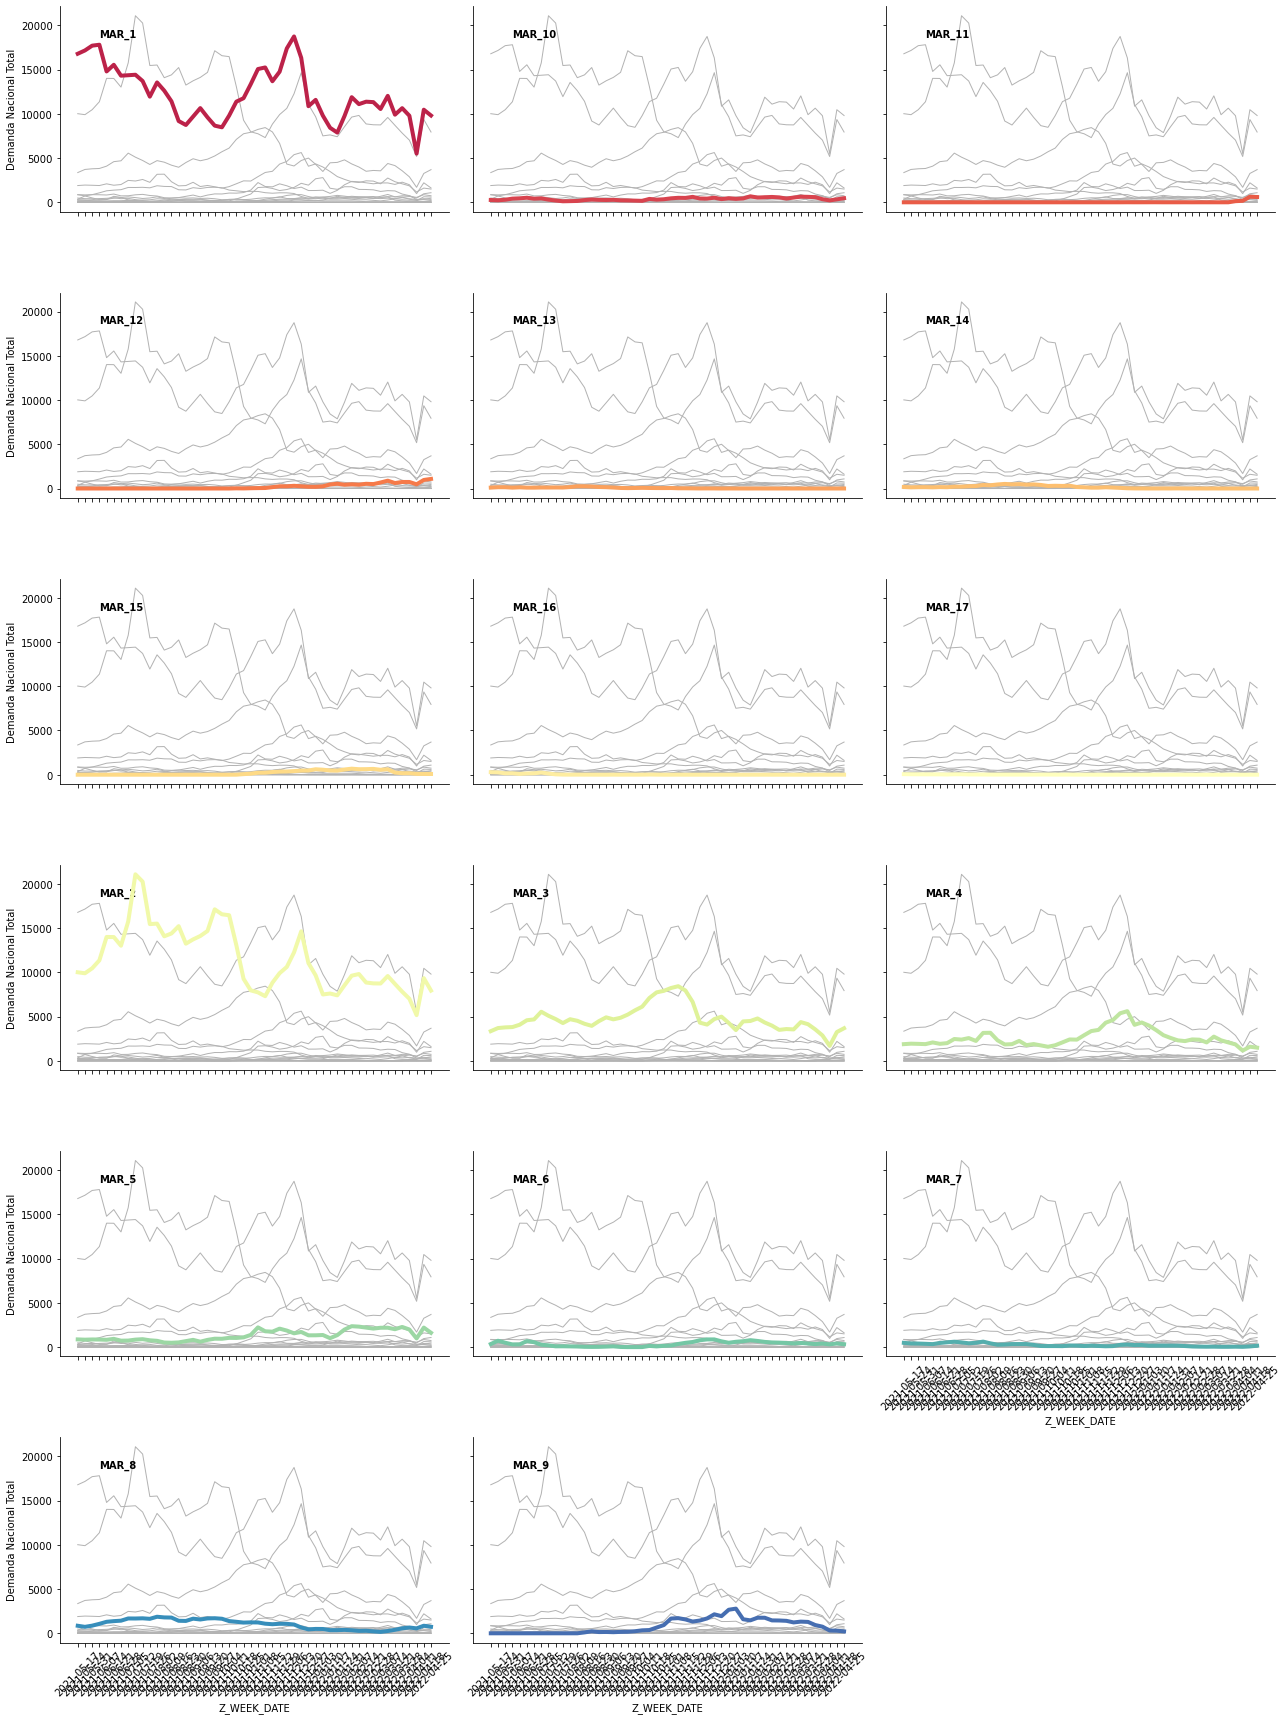

In [42]:
### Realizamos un análisis 
g = sns.relplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda",
                col = "Z_MARCA", hue = "Z_MARCA",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 3, height = 4, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda", units="Z_MARCA",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

#ax.set_xticks('Z_WEEK_DATE', rotation = 90)
g.set_titles("")
g.set_axis_labels("Z_WEEK_DATE", "Demanda Nacional Total")
g.set_xticklabels(ax.get_xticklabels(),rotation = 45)
g.tight_layout()

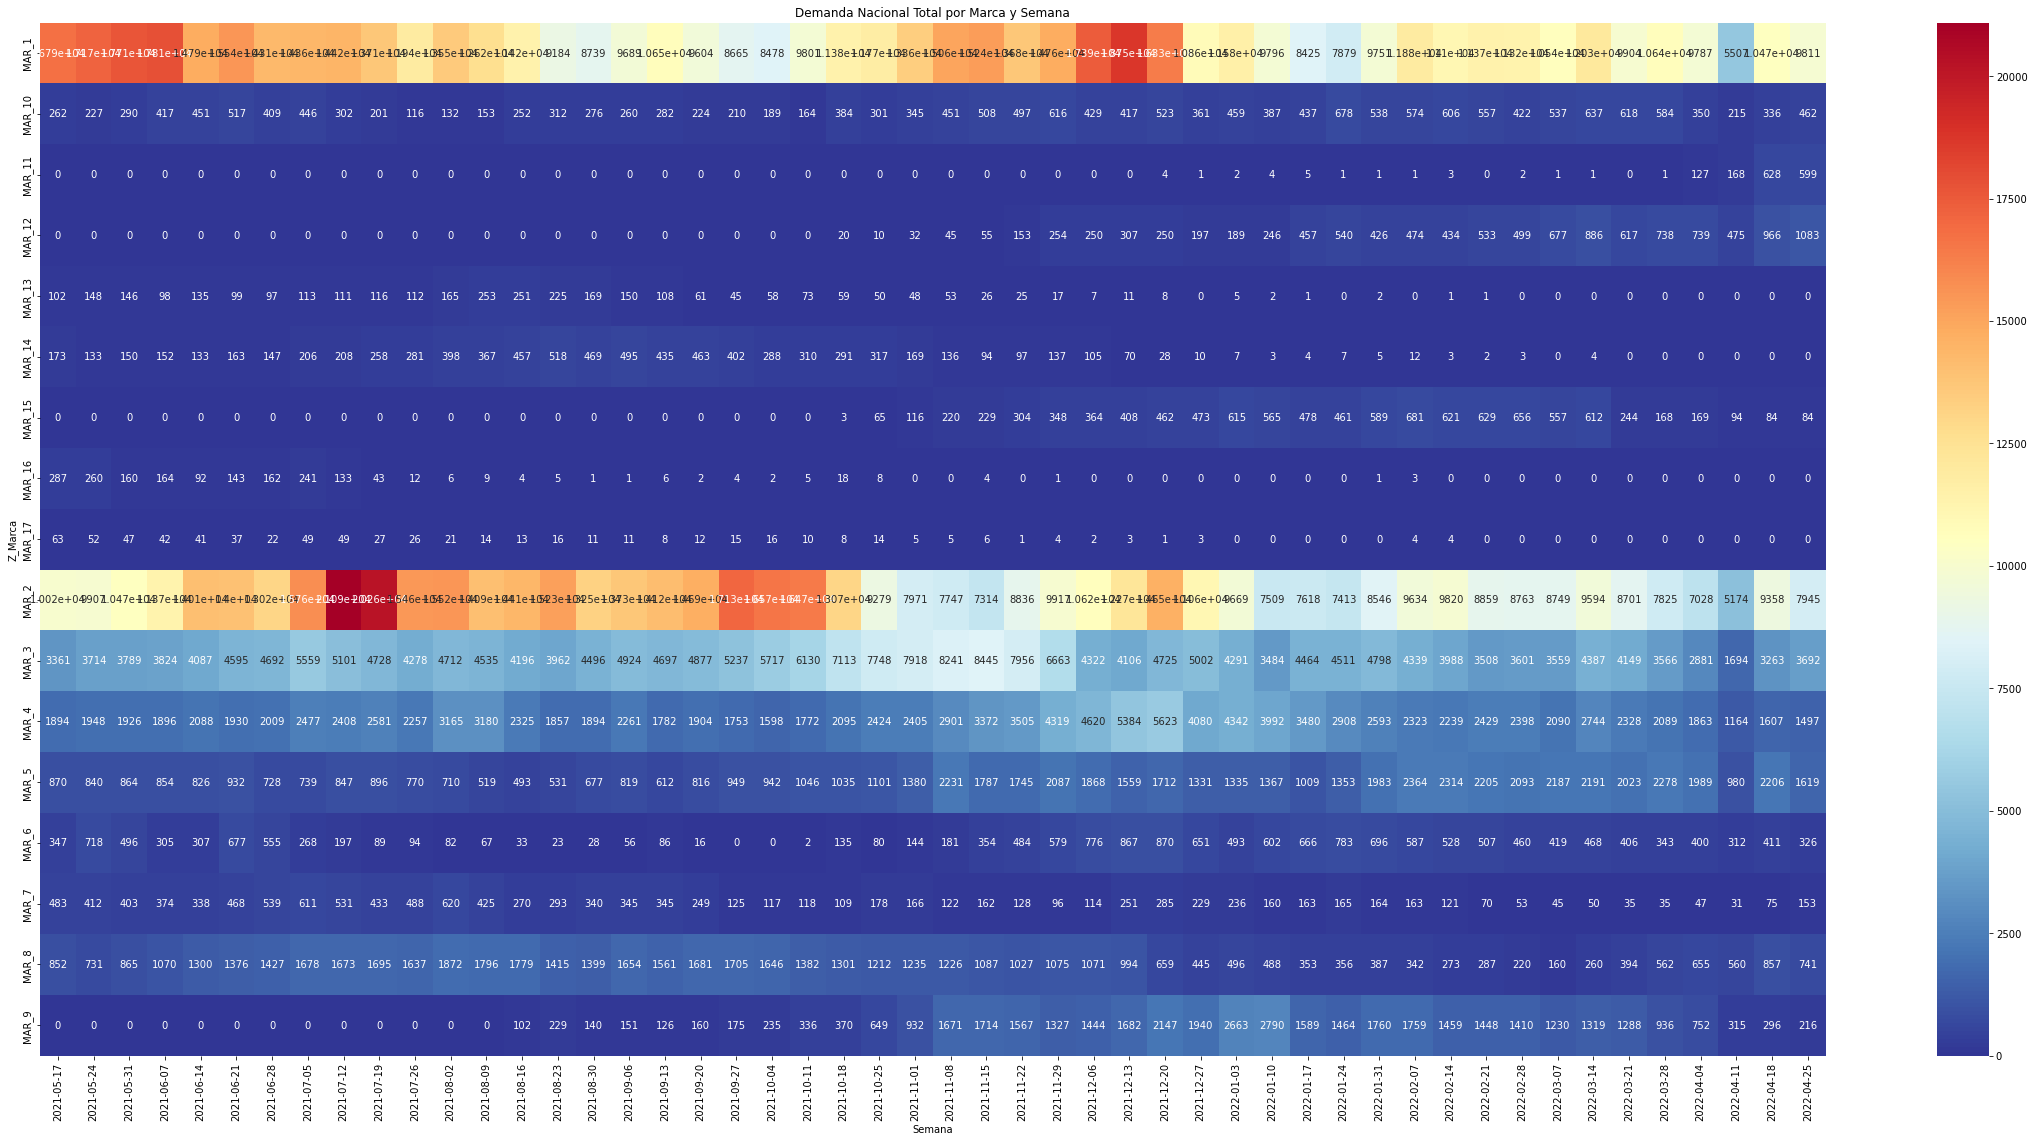

In [43]:
aux['Demanda'] = aux['Demanda'].map(lambda x: round(x,2))
df_pivot = pd.pivot_table(aux,
                          values='Demanda',
                          index='Z_MARCA',
                          columns='Z_WEEK_DATE')

plt.figure(figsize = (40,19))
plt.title('Demanda Nacional Total por Marca y Semana')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Semana')
plt.ylabel('Z_Marca')
plt.show()

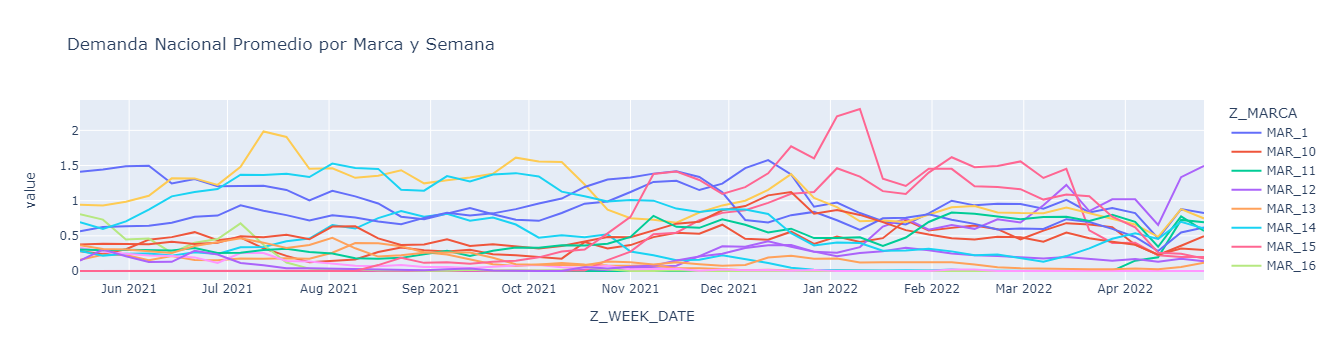

In [44]:
aux = train[['Z_MARCA', 'Demanda', 'Z_WEEK_DATE']].groupby(['Z_MARCA', 'Z_WEEK_DATE']).mean()
aux = aux[aux['Demanda'].notna()].reset_index()


aux_ = pd.pivot_table(aux, index = 'Z_WEEK_DATE', values='Demanda', columns='Z_MARCA').reset_index()

import plotly.express as px

fig = px.line(aux_, x='Z_WEEK_DATE', y=aux_.columns,
              hover_data={'Z_WEEK_DATE': "|%B %d, %Y"},
              title='Demanda Nacional Promedio por Marca y Semana')
fig.update_xaxes(
    dtick="M1",
    #tickformat="%b\n%Y"
)
fig.show()

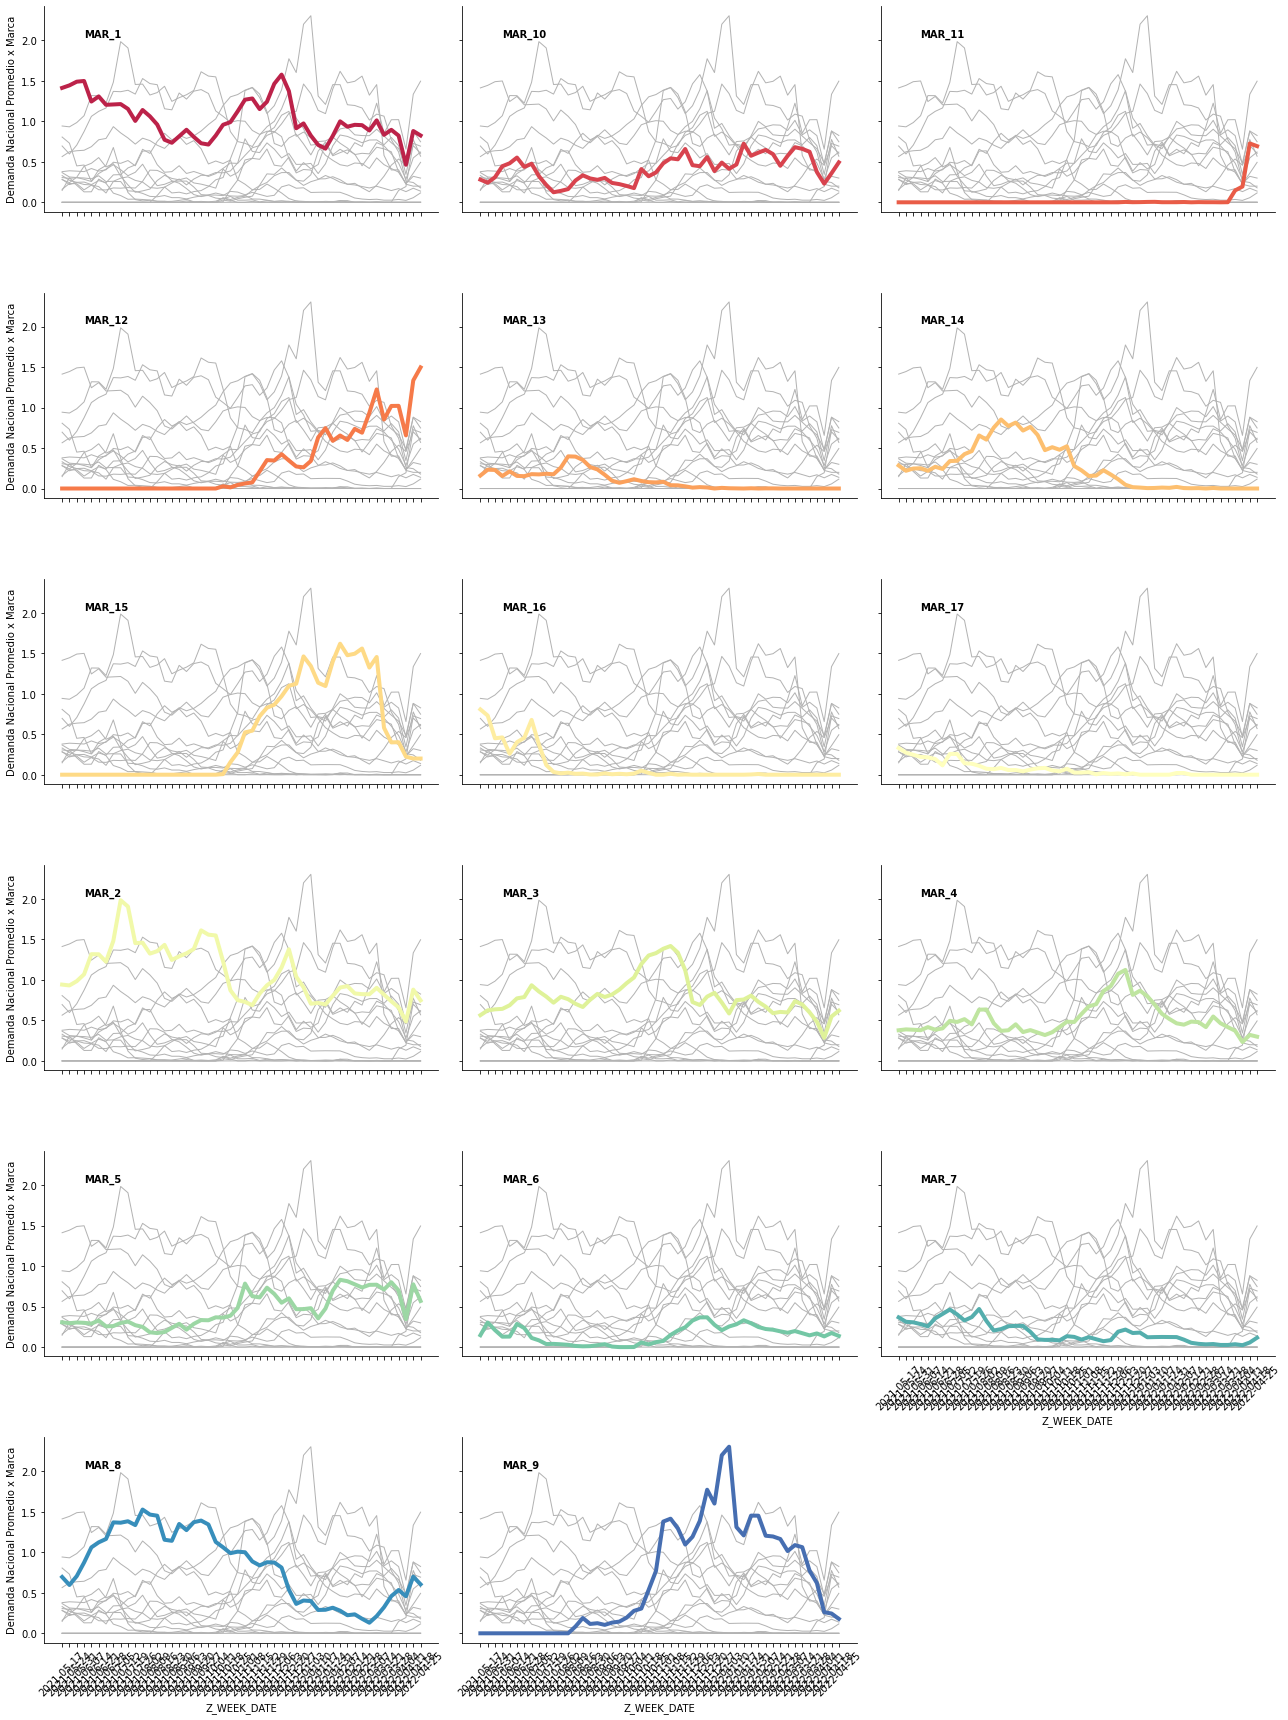

In [45]:
### Realizamos un análisis 
g = sns.relplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda",
                col = "Z_MARCA", hue = "Z_MARCA",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 3, height = 4, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda", units="Z_MARCA",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

#ax.set_xticks('Z_WEEK_DATE', rotation = 90)
g.set_titles("")
g.set_axis_labels("Z_WEEK_DATE", "Demanda Nacional Promedio x Marca")
g.set_xticklabels(ax.get_xticklabels(),rotation = 45)
g.tight_layout()

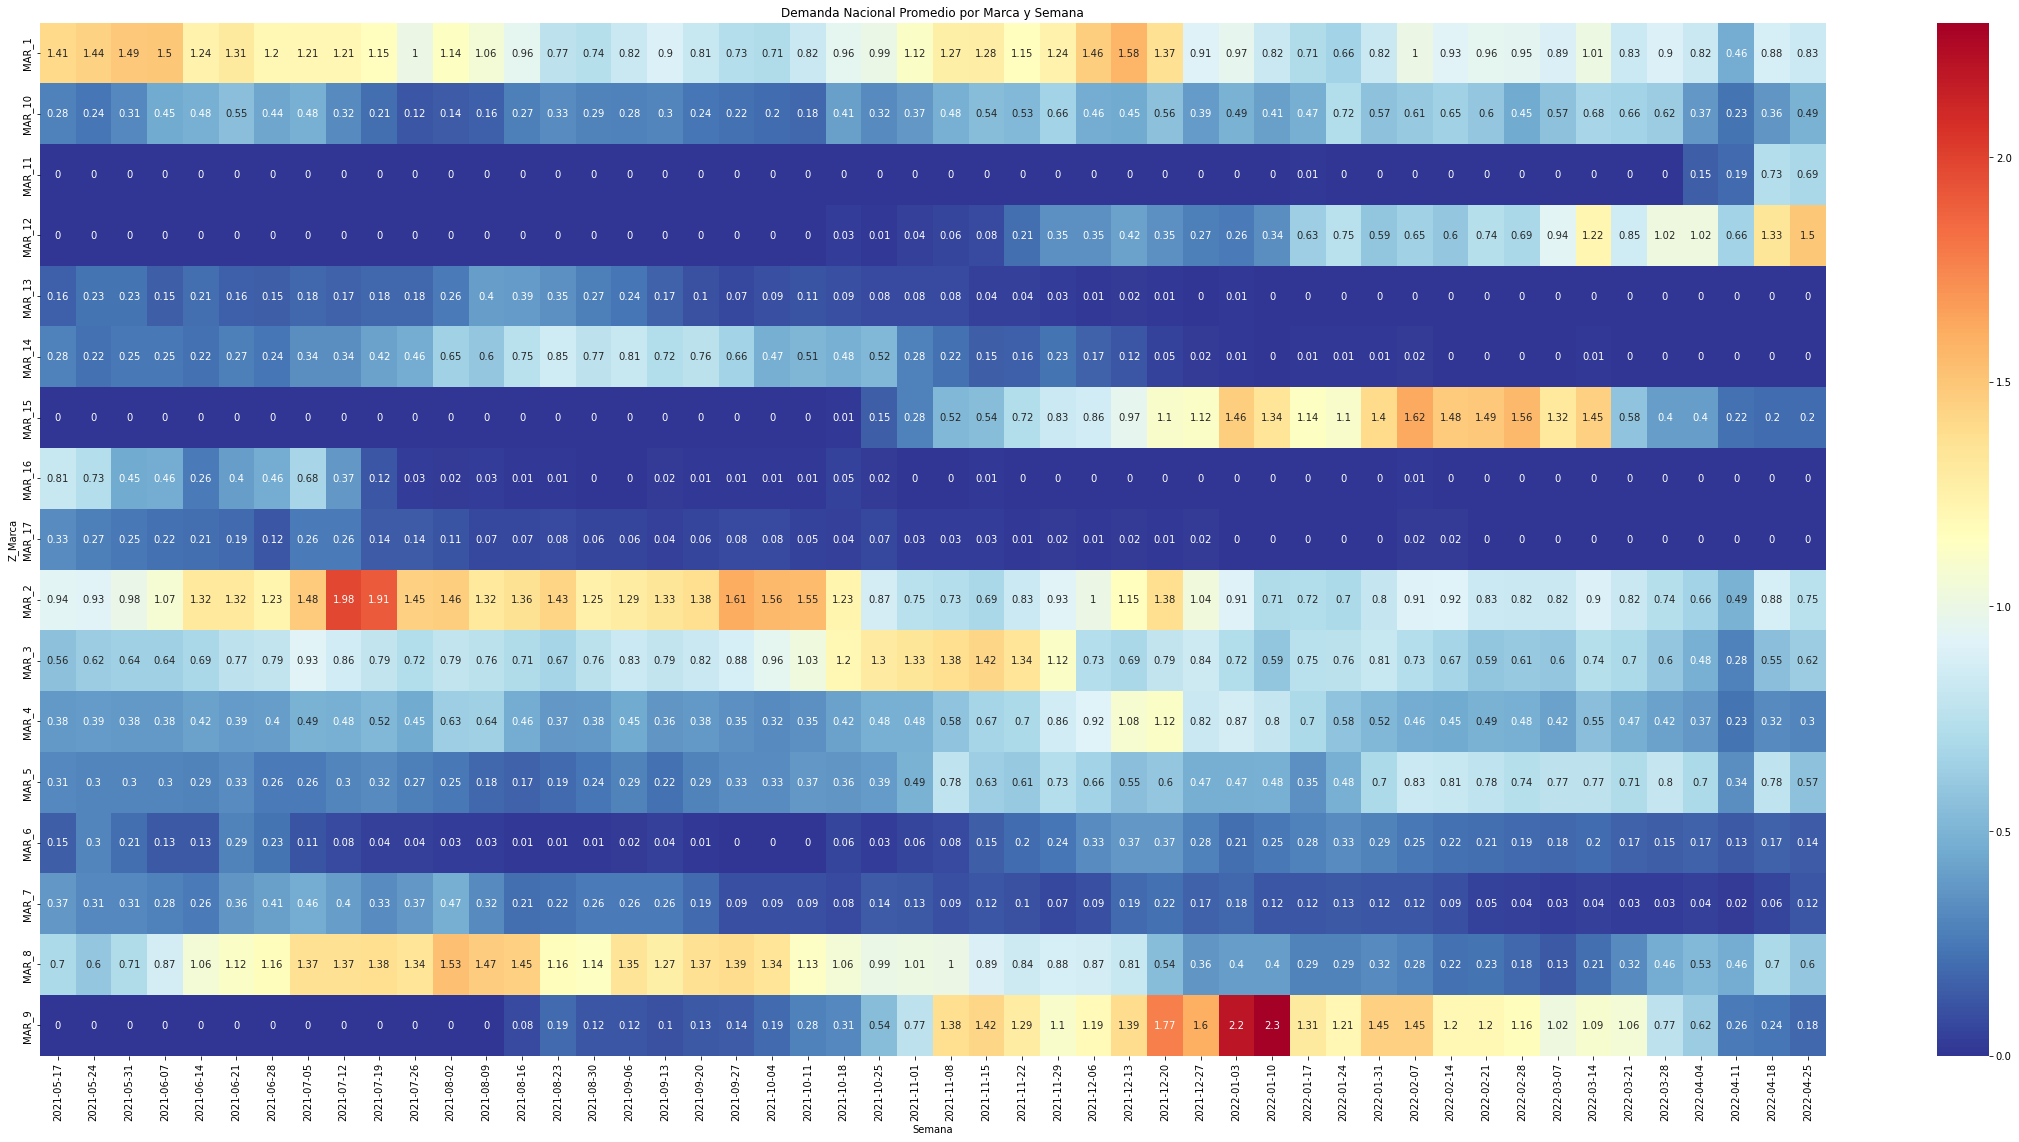

In [46]:
aux['Demanda'] = aux['Demanda'].map(lambda x: round(x,2))
df_pivot = pd.pivot_table(aux,
                          values='Demanda',
                          index='Z_MARCA',
                          columns='Z_WEEK_DATE')

plt.figure(figsize = (40,19))
plt.title('Demanda Nacional Promedio por Marca y Semana')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Semana')
plt.ylabel('Z_Marca')
plt.show()

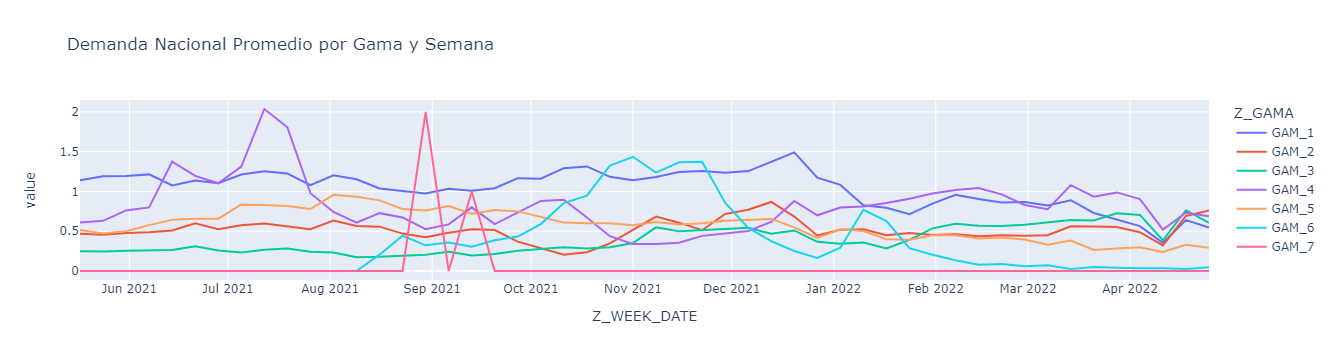

In [54]:
aux = train[['Z_GAMA', 'Demanda', 'Z_WEEK_DATE']].groupby(['Z_GAMA', 'Z_WEEK_DATE']).mean()
aux = aux[aux['Demanda'].notna()].reset_index()

aux_ = pd.pivot_table(aux, index = 'Z_WEEK_DATE', values='Demanda', columns='Z_GAMA').reset_index()

import plotly.express as px

fig = px.line(aux_, x='Z_WEEK_DATE', y=aux_.columns,
              hover_data={'Z_WEEK_DATE': "|%B %d, %Y"},
              title='Demanda Nacional Promedio por Gama y Semana')
fig.update_xaxes(
    dtick="M1",
    #tickformat="%b\n%Y"
)
fig.show()

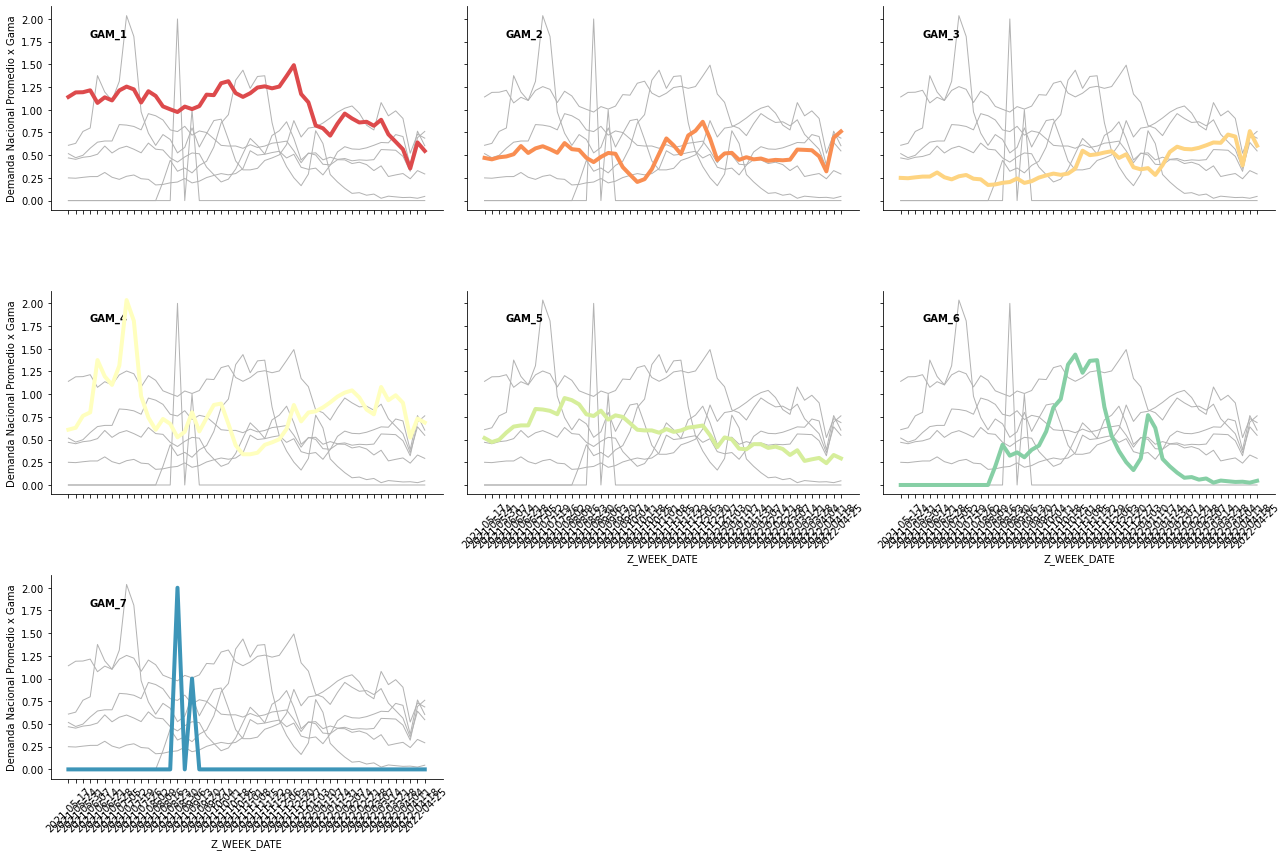

In [48]:
g = sns.relplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda",
                col = "Z_GAMA", hue = "Z_GAMA",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 3, height = 4, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda", units="Z_GAMA",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

#ax.set_xticks('Z_WEEK_DATE', rotation = 90)
g.set_titles("")
g.set_axis_labels("Z_WEEK_DATE", "Demanda Nacional Promedio x Gama")
g.set_xticklabels(ax.get_xticklabels(),rotation = 45)
g.tight_layout()

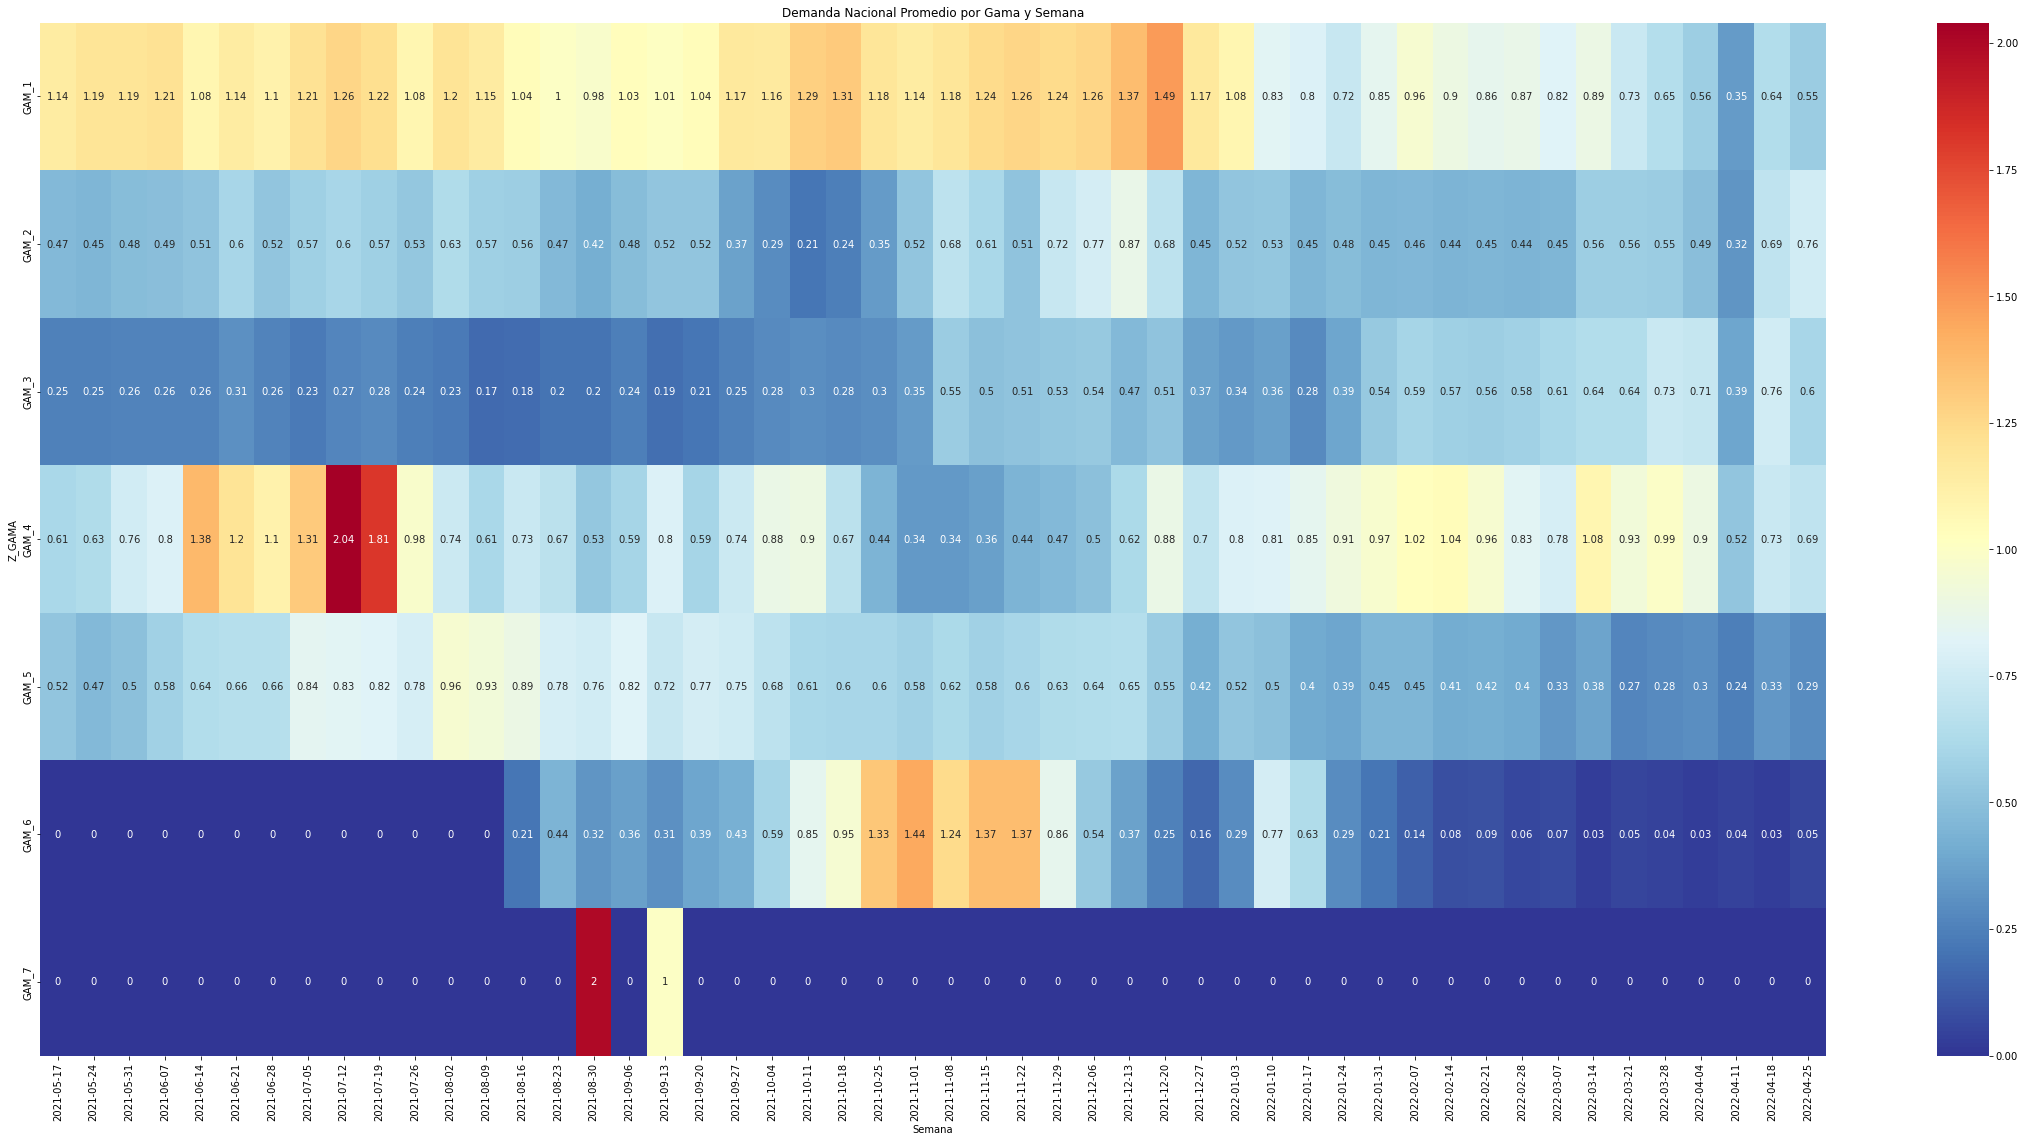

In [50]:
aux['Demanda'] = aux['Demanda'].map(lambda x: round(x,2))
df_pivot = pd.pivot_table(aux,
                          values='Demanda',
                          index='Z_GAMA',
                          columns='Z_WEEK_DATE')

plt.figure(figsize = (40,19))
plt.title('Demanda Nacional Promedio por Gama y Semana')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Semana')
plt.ylabel('Z_GAMA')
plt.show()

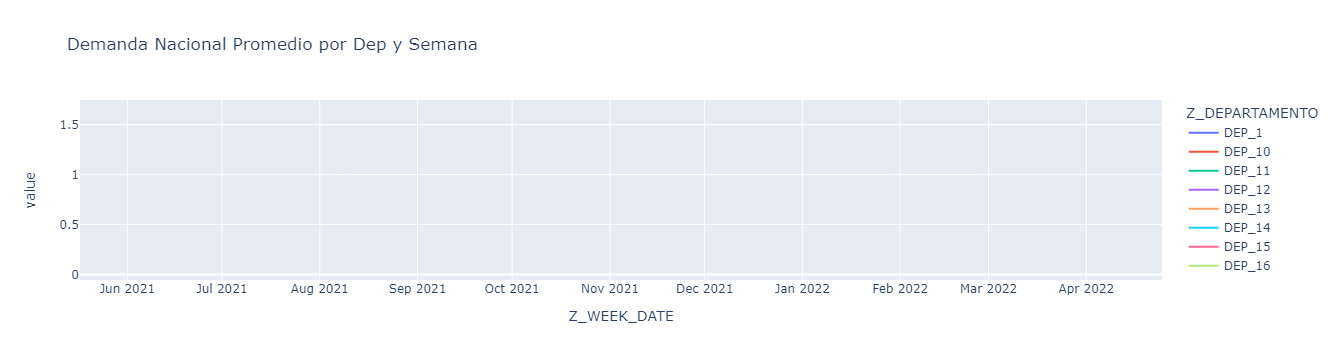

In [58]:
aux = train[['Z_DEPARTAMENTO', 'Demanda', 'Z_WEEK_DATE']].groupby(['Z_DEPARTAMENTO', 'Z_WEEK_DATE']).mean()
aux = aux[aux['Demanda'].notna()].reset_index()

aux_ = pd.pivot_table(aux, index = 'Z_WEEK_DATE', values='Demanda', columns='Z_DEPARTAMENTO').reset_index()

fig = px.line(aux_, x='Z_WEEK_DATE', y=aux_.columns,
              hover_data={'Z_WEEK_DATE': "|%B %d, %Y"},
              title='Demanda Nacional Promedio por Dep y Semana')
fig.update_xaxes(
    dtick="M1",
)
fig.show()

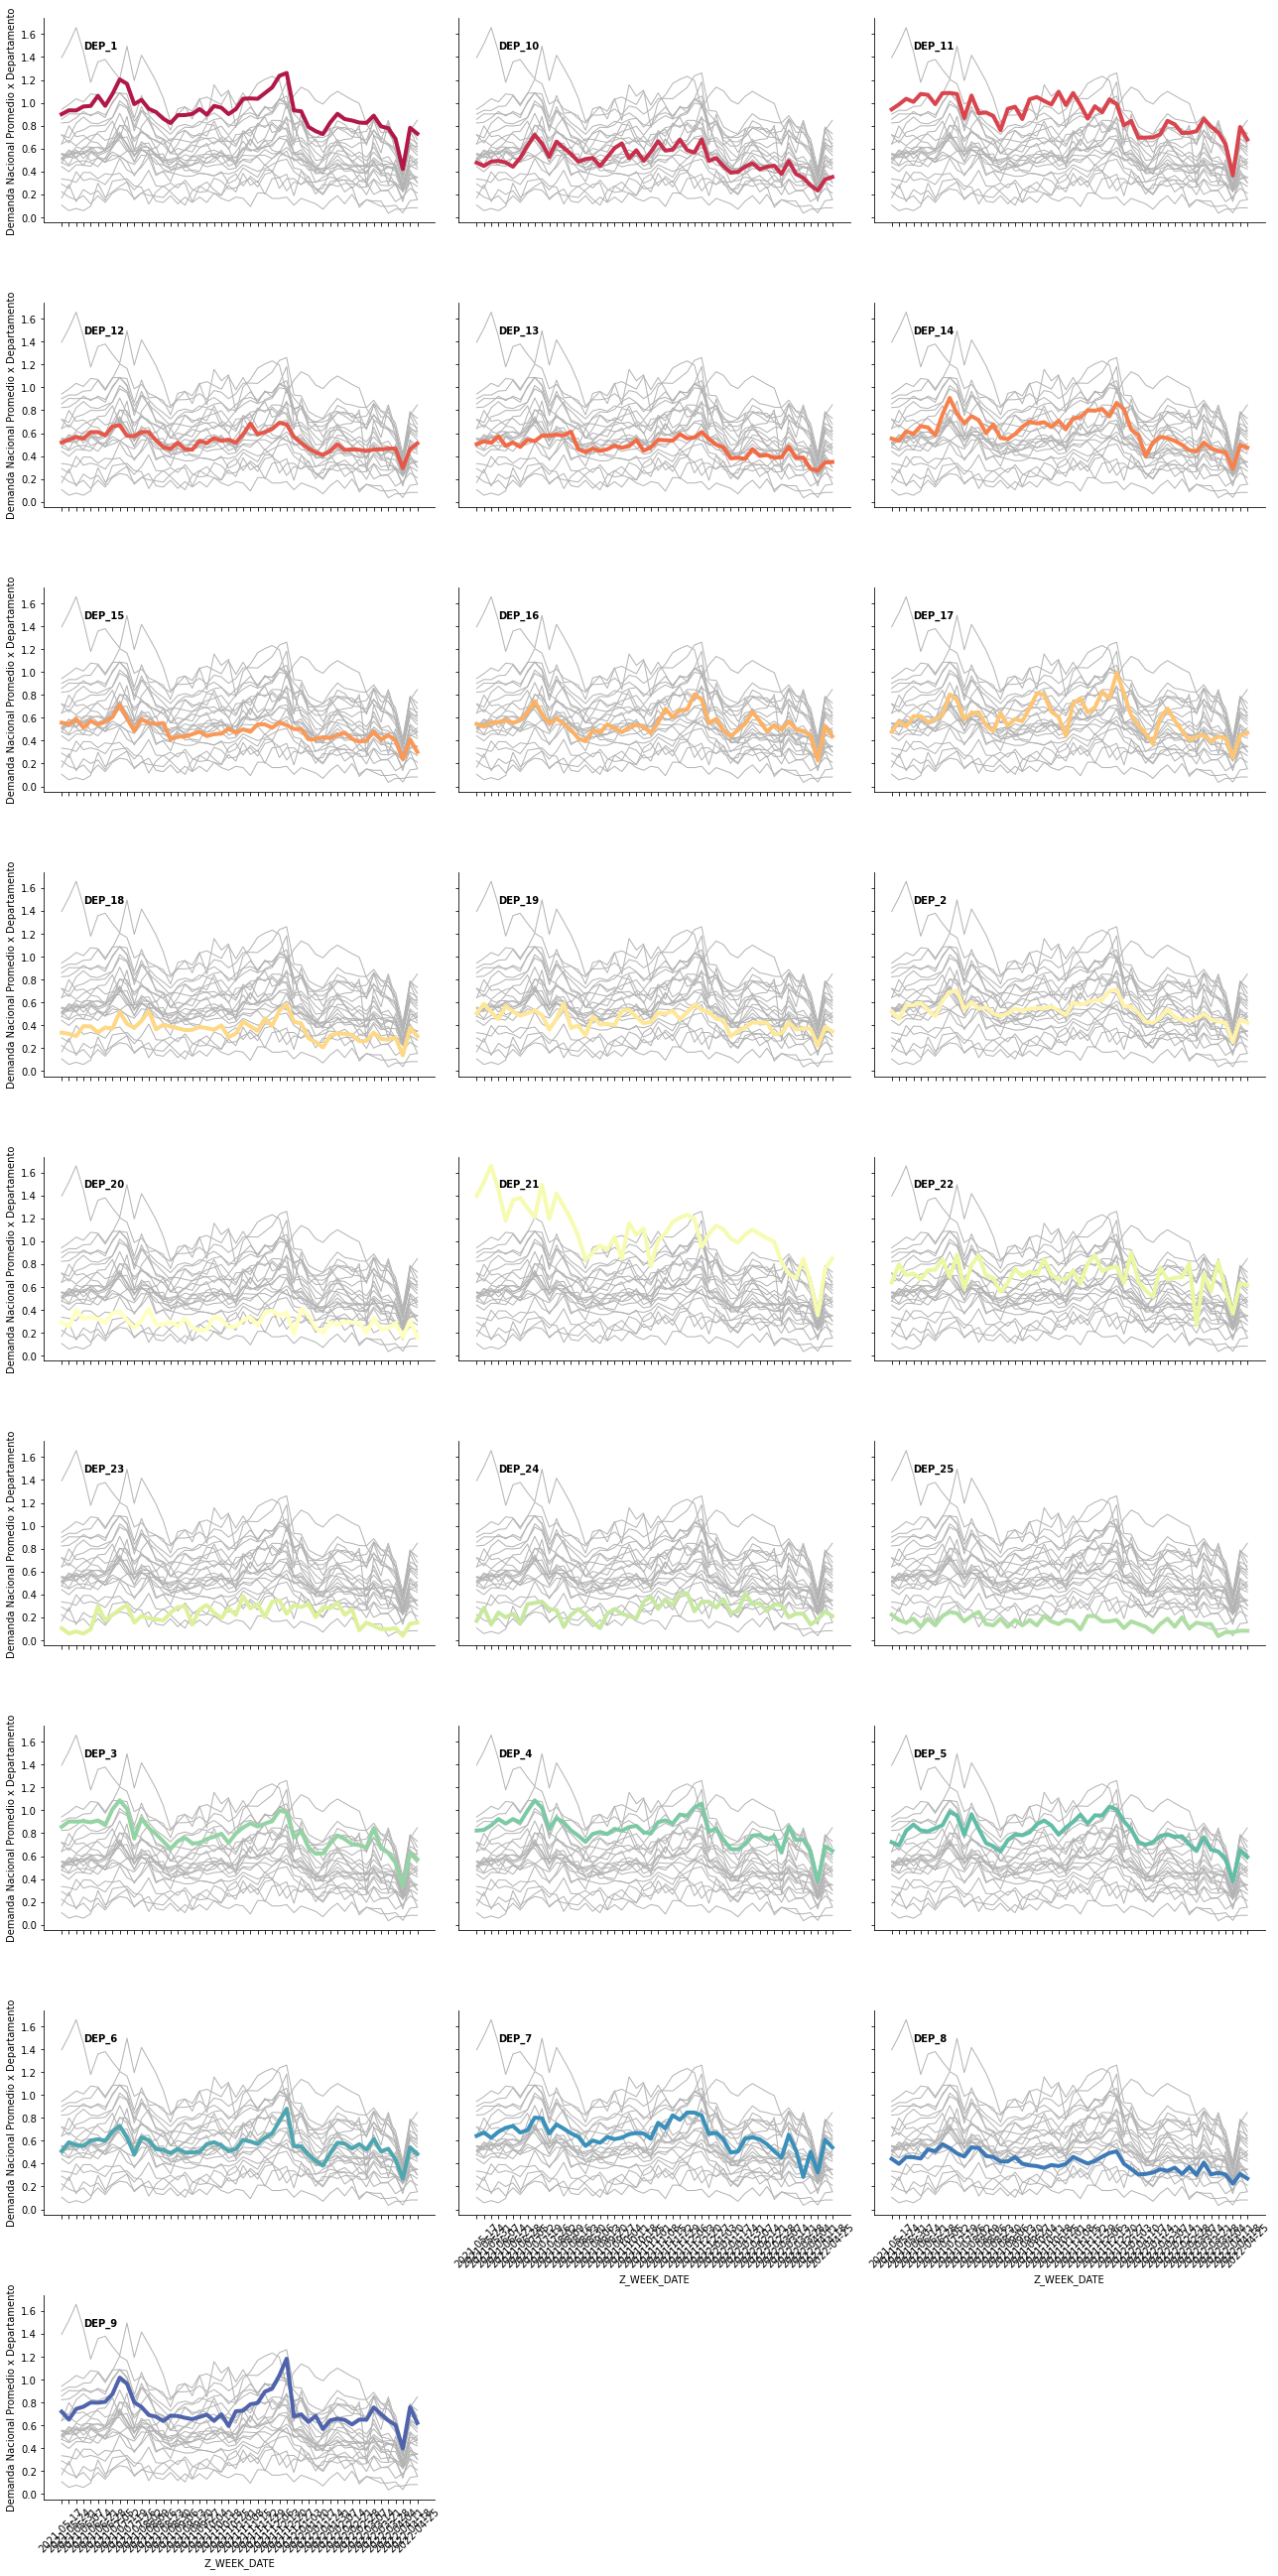

In [59]:
g = sns.relplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda",
                col = "Z_DEPARTAMENTO", hue = "Z_DEPARTAMENTO",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 3, height = 4, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = aux, x = "Z_WEEK_DATE", y = "Demanda", units="Z_DEPARTAMENTO",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

#ax.set_xticks('Z_WEEK_DATE', rotation = 90)
g.set_titles("")
g.set_axis_labels("Z_WEEK_DATE", "Demanda Nacional Promedio x Departamento")
g.set_xticklabels(ax.get_xticklabels(),rotation = 45)
g.tight_layout()

In [60]:
aux['Demanda'] = aux['Demanda'].map(lambda x: round(x,2))
df_pivot = pd.pivot_table(aux,
                          values='Demanda',
                          index='Z_DEPARTAMENTO',
                          columns='Z_WEEK_DATE')

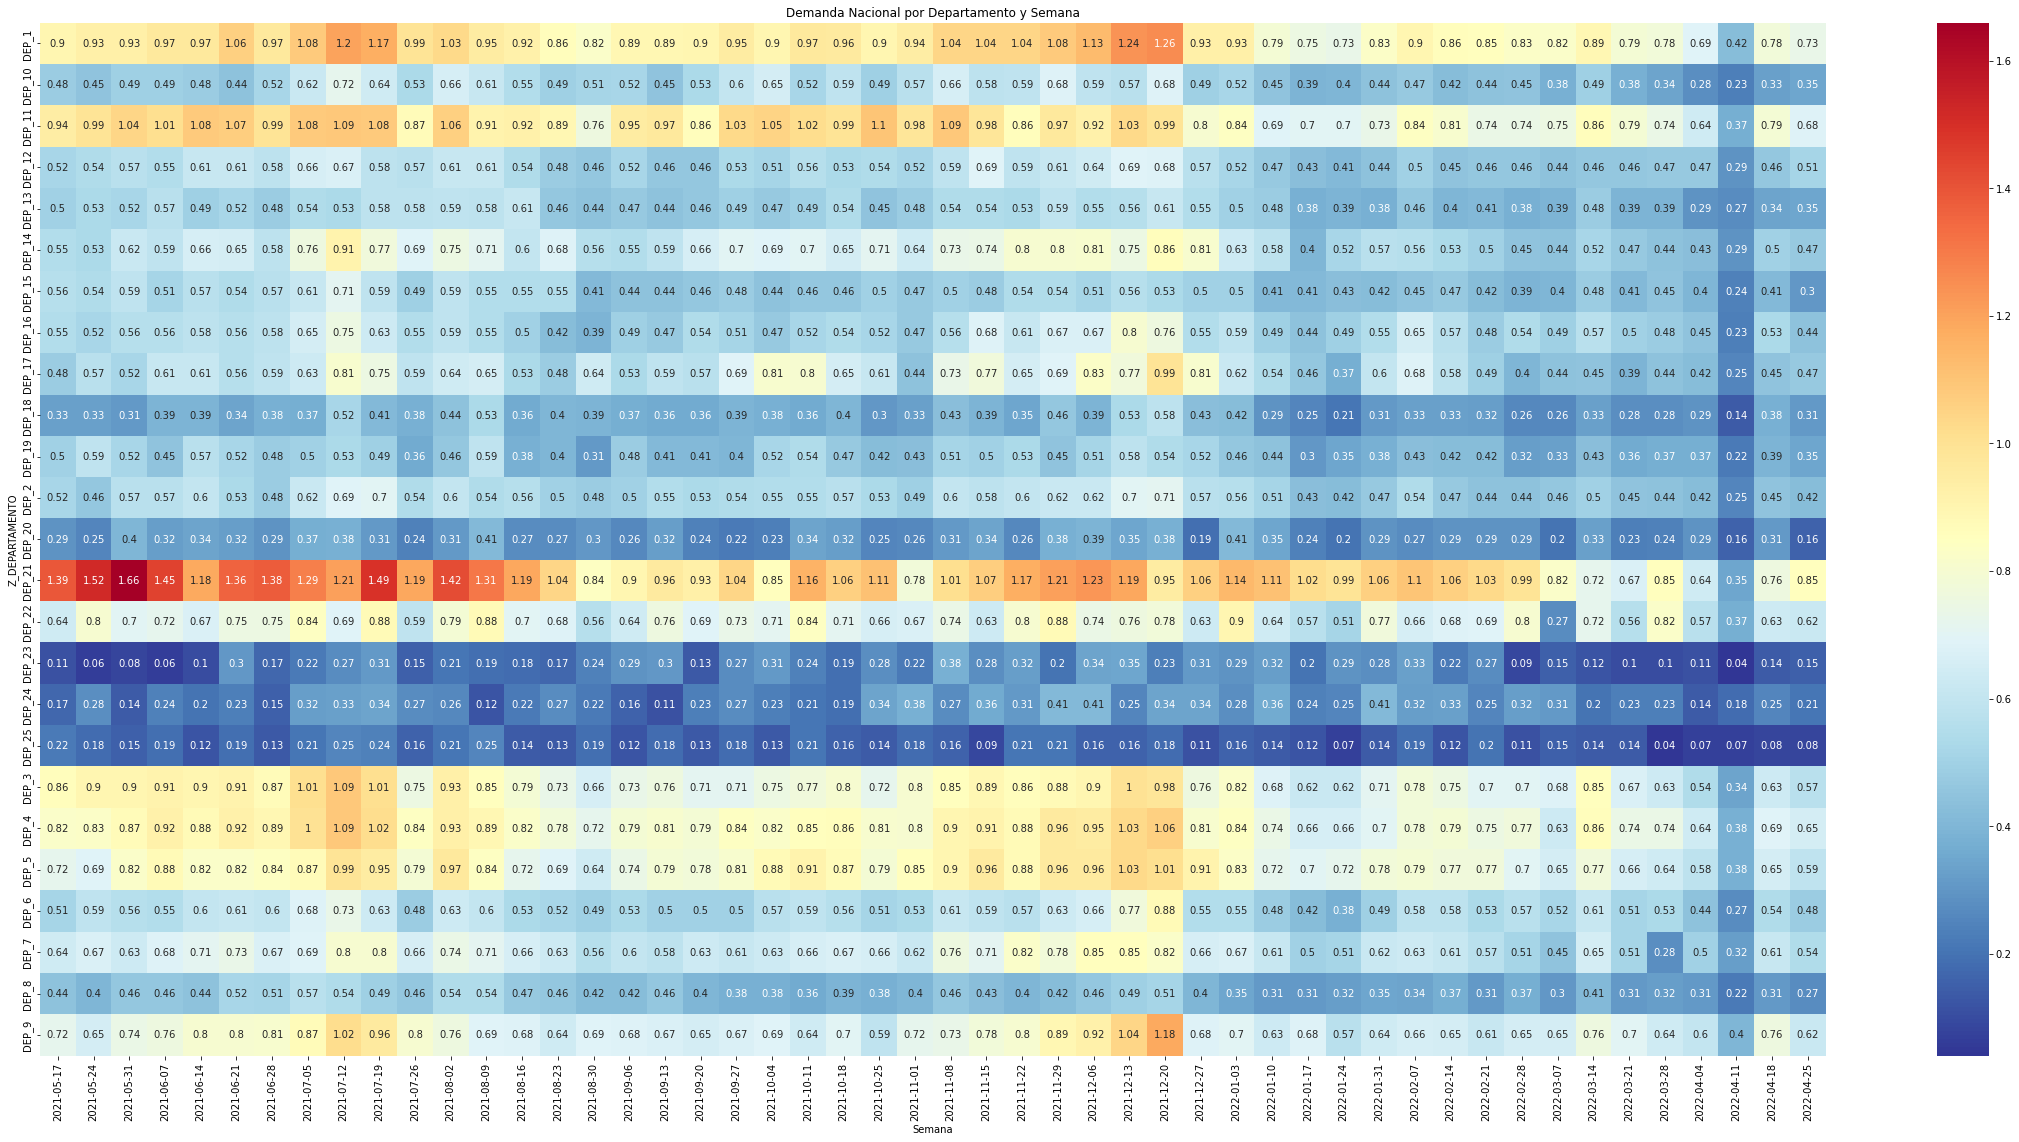

In [61]:
plt.figure(figsize = (40,19))
plt.title('Demanda Nacional por Departamento y Semana')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Semana')
plt.ylabel('Z_DEPARTAMENTO')
plt.show()

In [63]:
aux_min_df = train[['Z_MODELO', 'Z_GAMA', 'Z_PUNTO_VENTA', 'Demanda']].groupby(['Z_MODELO', 'Z_GAMA', 'Z_PUNTO_VENTA']).min().reset_index()
aux_min_df = aux_min_df[aux_min_df['Demanda'].notna()]
aux_min_df[aux_min_df['Demanda'] != 0]

### Solo hay 70 IDs que nunca han tenido como Demanda mínima a 0 durante todo el periodo de análisis.

Z_MODELO Z_GAMA Z_PUNTO_VENTA  Demanda
3531    MOD_11  GAM_1       PVENT_6        1
10512   MOD_15  GAM_5      PVENT_36        1
19246    MOD_3  GAM_4       PVENT_1       20
19247    MOD_3  GAM_4      PVENT_10        8
19252    MOD_3  GAM_4     PVENT_104        1
...        ...    ...           ...      ...
19703    MOD_3  GAM_4       PVENT_8        9
19704    MOD_3  GAM_4      PVENT_80        1
19713    MOD_3  GAM_4      PVENT_89        1
19714    MOD_3  GAM_4       PVENT_9        2
19717    MOD_3  GAM_4      PVENT_92        1

[70 rows x 4 columns]

In [64]:
### Revisamos algunos estadísticos agrupados por Gama Año y Mes ###

print(train[['Z_GAMA', 'Demanda', 'Z_YEAR', 'Z_MONTH' ]].groupby(['Z_YEAR','Z_GAMA', 'Z_MONTH']).agg(
                                                            func = {'Demanda': [np.mean, sum, min, max, pd.Series.nunique]}).to_string())

                        Demanda                          
                           mean     sum min   max nunique
Z_YEAR Z_GAMA Z_MONTH                                    
2021   GAM_1  5        1.175239   73282   0   808     133
              6        1.132451   94152   0  1032     139
              7        1.193060   99191   0   391     126
              8        1.074717  111690   0   411     122
              9        1.062329   88322   0   458     136
              10       1.237816  102912   0   762     155
              11       1.212663  126026   0   870     156
              12       1.322781  109976   0   934     160
       GAM_2  5        0.466814   17154   0   262      81
              6        0.530309   25983   0   357      97
              7        0.566209   27742   0   305     107
              8        0.530182   32471   0   353     100
              9        0.472345   23143   0   336      87
              10       0.268369   13149   0   134      57
              

In [65]:
### Revisamos algunos estadísticos agrupados por Marca, Año y Mes ###

train[train['Demanda'] != 0][['Z_MARCA', 'Demanda']].groupby(['Z_MARCA']).agg(func = {'Demanda': [np.mean, sum, min, max]})

Demanda                  
             mean     sum min   max
Z_MARCA                            
MAR_1    5.581683  611345   1  1032
MAR_10   3.529594   19321   1    40
MAR_11   4.917460    1549   1    25
MAR_12   3.712082   11552   1    40
MAR_13   1.418092    3151   1    21
MAR_14   2.524121    8110   1    87
MAR_15   2.702440   10299   1    31
MAR_16   1.996629    1777   1    34
MAR_17   1.399577     662   1     5
MAR_2    5.805417  575520   1  1451
MAR_3    4.060023  237625   1   600
MAR_4    2.904720  129719   1   271
MAR_5    3.253969   66612   1   231
MAR_6    2.368428   17974   1   380
MAR_7    2.202473   11933   1   110
MAR_8    3.644478   50917   1   240
MAR_9    3.893063   39791   1   442

In [66]:
### Revisamos algunos estadísticos agrupados por Año y Mes ###

train[[ 'Z_YEAR' , 'Z_MONTH', 'Demanda']].groupby([ 'Z_YEAR' , 'Z_MONTH']).agg(func = {'Demanda': [np.mean, sum, min, max]})

Demanda                  
                    mean     sum min   max
Z_YEAR Z_MONTH                            
2021   5        0.770709  109070   0   808
       6        0.824508  155578   0  1032
       7        0.912052  172097   0  1451
       8        0.765985  180669   0   552
       9        0.744817  140541   0   558
       10       0.774124  146071   0   762
       11       0.844246  199128   0   870
       12       0.929462  175382   0   934
2022   1        0.668535  157684   0   482
       2        0.704677  132967   0   671
       3        0.669938  126412   0   445
       4        0.541931  102258   0   497

Algo muy importante según la bibliografía es revisar siempre la autocorrelación, esta nos permitirá saber que tan alto o bajo es la correlación de una variable en un tiempo T con el T-1. Para ello haremos un poco de data visualización de la función plot_acf con respecto a la Demanda Total, así como Demanda por algunas marcas como ejemplo.

En ella se puede observar la variable "Lag en K", un lag se define como un valor previo en K steps previos. Por lo que "Lag en 1" significa cual fue el valor de la demanda total una semana anterior, y así sucesivamente hasta el "Lag en 49" ya que son 50 semanas en el training.

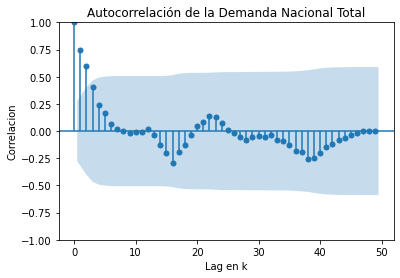

In [67]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(train[['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda Nacional Total")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

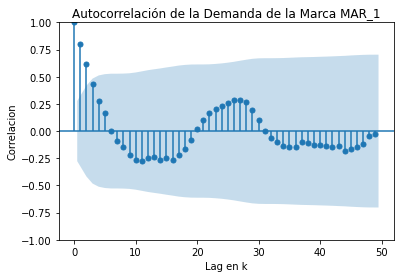

In [68]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(train[train['Z_MARCA'] == 'MAR_1'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_1")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

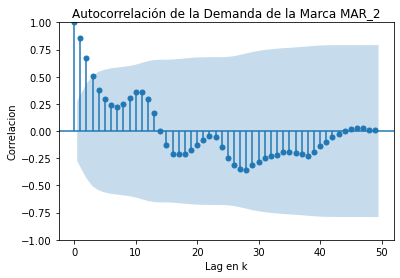

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

#rcParams["figure.figsize"] = 14, 4
fig = plot_acf(train[train['Z_MARCA'] == 'MAR_2'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_2")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

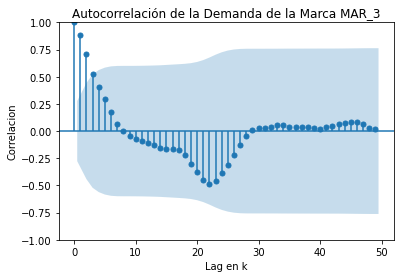

In [70]:
from statsmodels.graphics.tsaplots import plot_acf

#rcParams["figure.figsize"] = 14, 4
fig = plot_acf(train[train['Z_MARCA'] == 'MAR_3'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_3")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

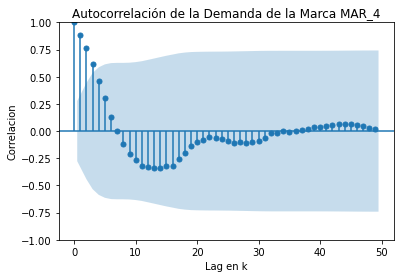

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(train[train['Z_MARCA'] == 'MAR_4'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_4")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

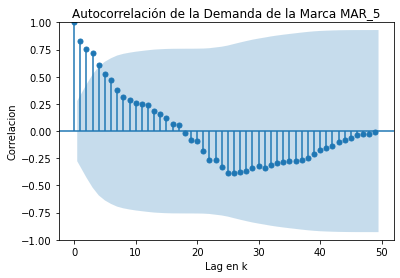

In [72]:
from statsmodels.graphics.tsaplots import plot_acf

#rcParams["figure.figsize"] = 14, 4
fig = plot_acf(train[train['Z_MARCA'] == 'MAR_5'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_5")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

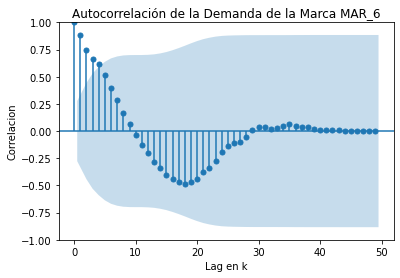

In [73]:
from statsmodels.graphics.tsaplots import plot_acf

#rcParams["figure.figsize"] = 14, 4
fig = plot_acf(train[train['Z_MARCA'] == 'MAR_6'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_6")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

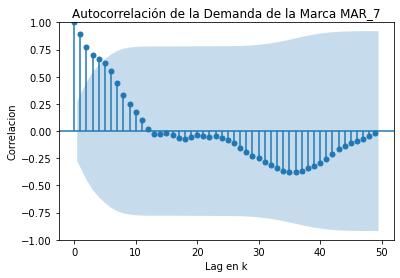

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

#rcParams["figure.figsize"] = 14, 4
fig = plot_acf(train[train['Z_MARCA'] == 'MAR_7'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_7")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

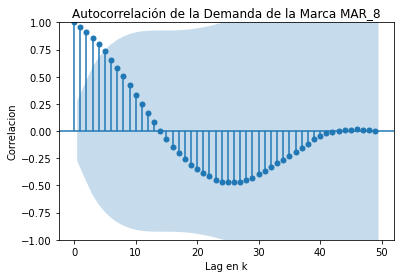

In [75]:
from statsmodels.graphics.tsaplots import plot_acf

#rcParams["figure.figsize"] = 14, 4
fig = plot_acf(train[train['Z_MARCA'] == 'MAR_8'][['Demanda', 'Z_WEEK_DATE']].groupby('Z_WEEK_DATE').sum()["Demanda"], lags=49)

plt.title("Autocorrelación de la Demanda de la Marca MAR_8")
plt.ylabel("Correlacion")
plt.xlabel("Lag en k")
fig.show();

Se ha observado que en la mayoría los últimos valores previos a un tiempo T como son: T-1, T-2 y T-3 en su mayoría está fuertemente correlacionados. Y en algunos casos desde el T-7 inclusive hay correlación negativa (Ver Marca MAR_7)

Se puede decir que no se puede concluir un número exacto de Lag en K que es más efectivo para todas las dimensiones de los IDs. Pero siempre ha funcionado en la mayoría de competencias de Kaggle bibliográficamente

<h2>Feature Engineering</h2>

### Lagging ###

In [76]:
train['ID'] = train['Z_MODELO'] + '-' + train['Z_GAMA'] + '-' + train['Z_PUNTO_VENTA']

In [77]:
train['Demanda_prev_1'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(1)
train['Demanda_prev_2'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(2)
train['Demanda_prev_3'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(3)
train['Demanda_prev_4'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(4)
train['Demanda_prev_5'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(5)
train['Demanda_prev_6'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(6)
train['Demanda_prev_7'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(7)
train['Demanda_prev_8'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(8)
train['Demanda_prev_9'] = train[['ID', 'Demanda']].groupby('ID')['Demanda'].shift(9)

In [78]:
train.columns

Index(['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA',
       'Z_WEEK', 'Demanda', 'Z_WEEK_DATE', 'Z_DAY', 'Z_MONTH', 'Z_YEAR', 'ID',
       'Demanda_prev_1', 'Demanda_prev_2', 'Demanda_prev_3', 'Demanda_prev_4',
       'Demanda_prev_5', 'Demanda_prev_6', 'Demanda_prev_7', 'Demanda_prev_8',
       'Demanda_prev_9'],
      dtype='object')

### Rolling Previous Stats ###

In [50]:
firstAttempt = True
for window in tqdm([3,5,9]):
    roll_prev_mean = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).mean()
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_mean_rolling_' + str(window)})
    roll_prev_median = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).mean()
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_median_rolling_' + str(window)})
    roll_prev_max = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).max()
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_max_rolling_' + str(window)})
    roll_prev_min = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).min()
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_min_rolling_' + str(window)})
    roll_prev_std = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).std()
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_std_rolling_' + str(window)})
    roll_prev_skew = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).skew()
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_skew_rolling_' + str(window)})
    roll_prev_kurt = pd.DataFrame(train[['ID', 'Demanda_prev_1']].groupby('ID')['Demanda_prev_1'].rolling(window,
                                                                           min_periods= 1).apply(pd.DataFrame.kurt)
                                                                        ).reset_index().rename(columns = {'Demanda_prev_1': \
                                                                                                'Demanda_kurt_rolling_'+ str(window)})

    roll_prev_mean.index = roll_prev_mean.level_1.values
    roll_prev_median.index = roll_prev_median.level_1.values
    roll_prev_max.index = roll_prev_max.level_1.values
    roll_prev_min.index = roll_prev_min.level_1.values
    roll_prev_std.index = roll_prev_std.level_1.values
    roll_prev_skew.index = roll_prev_skew.level_1.values
    roll_prev_kurt.index = roll_prev_kurt.level_1.values
    
    if not firstAttempt:
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_mean.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_median.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_max.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_min.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_std.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_skew.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_kurt.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
    else:
        roll_cum_stats = pd.merge(roll_prev_mean.drop(['ID', 'level_1'], axis = 1), roll_prev_median.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_max.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_min.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_std.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_skew.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        roll_cum_stats = pd.merge(roll_cum_stats, roll_prev_kurt.drop(['ID', 'level_1'], axis = 1), left_index=True, right_index=True)
        firstAttempt = False

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:26<00:00, 188.96s/it]


In [51]:
roll_cum_stats

Demanda_mean_rolling_3  Demanda_median_rolling_3  \
37873                       NaN                       NaN   
85046                  0.000000                  0.000000   
132219                 0.000000                  0.000000   
179392                 0.000000                  0.000000   
226565                 0.000000                  0.000000   
...                         ...                       ...   
2130719                0.333333                  0.333333   
2177892                0.333333                  0.333333   
2225065                0.000000                  0.000000   
2272238                0.333333                  0.333333   
2319411                0.666667                  0.666667   

         Demanda_max_rolling_3  Demanda_min_rolling_3  Demanda_std_rolling_3  \
37873                      NaN                    NaN                    NaN   
85046                      0.0                    0.0                    NaN   
132219                     0.0                    0.0           0.000000e+00   
179392                     0.0                    0.0           0.000000e+00   
226565                     0.0                    0.0           0.000000e+00   
...                        ...                    ...                    ...   
2130719                    1.0                    0.0           5.773503e-01   
2177892                    1.0                    0.0           5.773503e-01   
2225065                    0.0                    0.0           1.290478e-08   
2272238                    1.0                    0.0           5.773503e-01   
2319411                    1.0                    0.0           5.773503e-01   

         Demanda_skew_rolling_3  Demanda_kurt_rolling_3  \
37873                       NaN                     NaN   
85046                       NaN                     NaN   
132219                      NaN                     NaN   
179392                      NaN                     NaN   
226565                      NaN                     NaN   
...                         ...                     ...   
2130719                1.732051                     NaN   
2177892                1.732051                     NaN   
2225065                     NaN                     NaN   
2272238                1.732051                     NaN   
2319411               -1.732051                     NaN   

         Demanda_mean_rolling_5  Demanda_median_rolling_5  \
37873                       NaN                       NaN   
85046                       0.0                       0.0   
132219                      0.0                       0.0   
179392                      0.0                       0.0   
226565                      0.0                       0.0   
...                         ...                       ...   
2130719                     0.6                       0.6   
2177892                     0.4                       0.4   
2225065                     0.2                       0.2   
2272238                     0.4                       0.4   
2319411                     0.4                       0.4   

         Demanda_max_rolling_5  ...  Demanda_std_rolling_5  \
37873                      NaN  ...                    NaN   
85046                      0.0  ...                    NaN   
132219                     0.0  ...               0.000000   
179392                     0.0  ...               0.000000   
226565                     0.0  ...               0.000000   
...                        ...  ...                    ...   
2130719                    1.0  ...               0.547723   
2177892                    1.0  ...               0.547723   
2225065                    1.0  ...               0.447214   
2272238                    1.0  ...               0.547723   
2319411                    1.0  ...               0.547723   

         Demanda_skew_rolling_5  Demanda_kurt_rolling_5  \
37873                       NaN                     NaN   
85046     

In [55]:
train_models = pd.merge(train, roll_cum_stats, left_index=True, right_index=True)

In [56]:
train_models.corr()

Demanda     Z_DAY   Z_MONTH    Z_YEAR  \
Demanda                   1.000000 -0.002035  0.012116 -0.013753   
Z_DAY                    -0.002035  1.000000 -0.084535  0.000584   
Z_MONTH                   0.012116 -0.084535  1.000000 -0.839799   
Z_YEAR                   -0.013753  0.000584 -0.839799  1.000000   
Demanda_prev_1            0.881644  0.000519  0.011483 -0.013006   
Demanda_prev_2            0.795727 -0.001466  0.008517 -0.010745   
Demanda_prev_3            0.738297 -0.003237  0.005171 -0.007239   
Demanda_prev_4            0.703393 -0.002992  0.003077 -0.005299   
Demanda_prev_5            0.658694 -0.000863  0.001283 -0.003831   
Demanda_prev_6            0.609231  0.003736 -0.000105 -0.002794   
Demanda_prev_7            0.568847  0.001898 -0.000882 -0.002120   
Demanda_prev_8            0.541720 -0.001507 -0.001726 -0.001018   
Demanda_prev_9            0.522293 -0.000876 -0.001752 -0.000693   
Demanda_mean_rolling_3    0.849786 -0.001473  0.008749 -0.010653   
Demanda_median_rolling_3  0.849786 -0.001473  0.008749 -0.010653   
Demanda_max_rolling_3     0.832419 -0.003573  0.009750 -0.008972   
Demanda_min_rolling_3     0.821347  0.001170  0.006606 -0.012341   
Demanda_std_rolling_3     0.662782 -0.003299  0.008766 -0.006825   
Demanda_skew_rolling_3   -0.079229 -0.002069 -0.005552  0.008844   
Demanda_kurt_rolling_3         NaN       NaN       NaN       NaN   
Demanda_mean_rolling_5    0.825749 -0.001744  0.006306 -0.008332   
Demanda_median_rolling_5  0.825749 -0.001744  0.006306 -0.008332   
Demanda_max_rolling_5     0.793961 -0.003831  0.007738 -0.004442   
Demanda_min_rolling_5     0.785733  0.002013  0.003305 -0.013265   
Demanda_std_rolling_5     0.663891 -0.002474  0.006603 -0.002550   
Demanda_skew_rolling_5   -0.130635  0.009470 -0.001199  0.018776   
Demanda_kurt_rolling_5   -0.016035 -0.000634  0.007277 -0.003815   
Demanda_mean_rolling_9    0.775331 -0.000713  0.003135 -0.005401   
Demanda_median_rolling_9  0.775331 -0.000713  0.003135 -0.005401   
Demanda_max_rolling_9     0.743002 -0.003806  0.004538  0.003708   
Demanda_min_rolling_9     0.672477  0.004463 -0.000524 -0.017895   
Demanda_std_rolling_9     0.675559 -0.001640  0.002529  0.005224   
Demanda_skew_rolling_9   -0.155650  0.006735  0.013868  0.039541   
Demanda_kurt_rolling_9   -0.024446 -0.004809  0.016224  0.007785   

                          Demanda_prev_1  Demanda_prev_2  Demanda_prev_3  \
Demanda                         0.881644        0.795727        0.738297   
Z_DAY                           0.000519       -0.001466       -0.003237   
Z_MONTH                         0.011483        0.008517        0.005171   
Z_YEAR                         -0.013006       -0.010745       -0.007239   
Demanda_prev_1                  1.000000        0.882199        0.796707   
Demanda_prev_2                  0.882199        1.000000        0.884335   
Demanda_prev_3                  0.796707        0.884335        1.000000   
Demanda_prev_4                  0.737894        0.796770        0.885480   
Demanda_prev_5                  0.702615        0.737032        0.798408   
Demanda_prev_6                  0.658157        0.701569        0.739430   
Demanda_prev_7                  0.608887        0.657616        0.704066   
Demanda_prev_8                  0.569143        0.609127        0.660389   
Demanda_prev_9                  0.542588        0.570324        0.612066   
Demanda_mean_rolling_3          0.941239        0.970367        0.941202   
Demanda_median_rolling_3        0.941239        0.970367        0.941202   
Demanda_max_rolling_3           0.916934        0.943040        0.938003   
Demanda_min_rolling_3           0.913842        0.926197        0.887120   
Demanda_std_rolling_3           0.717776        0.749107        0.783952   
Demanda_skew_rolling_3         -0.086445       -0.104723       -0.084158   
Demanda_kurt_rolling_3               NaN             NaN             NaN   
Demanda_mean_rolling_5          0.899445        0.

In [66]:
descriptive_columns = ['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA']

In [60]:
train_models.columns

Index(['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA',
       'Z_WEEK', 'Demanda', 'Z_WEEK_DATE', 'Z_DAY', 'Z_MONTH', 'Z_YEAR', 'ID',
       'Demanda_prev_1', 'Demanda_prev_2', 'Demanda_prev_3', 'Demanda_prev_4',
       'Demanda_prev_5', 'Demanda_prev_6', 'Demanda_prev_7', 'Demanda_prev_8',
       'Demanda_prev_9', 'Demanda_mean_rolling_3', 'Demanda_median_rolling_3',
       'Demanda_max_rolling_3', 'Demanda_min_rolling_3',
       'Demanda_std_rolling_3', 'Demanda_skew_rolling_3',
       'Demanda_kurt_rolling_3', 'Demanda_mean_rolling_5',
       'Demanda_median_rolling_5', 'Demanda_max_rolling_5',
       'Demanda_min_rolling_5', 'Demanda_std_rolling_5',
       'Demanda_skew_rolling_5', 'Demanda_kurt_rolling_5',
       'Demanda_mean_rolling_9', 'Demanda_median_rolling_9',
       'Demanda_max_rolling_9', 'Demanda_min_rolling_9',
       'Demanda_std_rolling_9', 'Demanda_skew_rolling_9',
       'Demanda_kurt_rolling_9'],
      dtype='object')

### Modeling Training Baseline Catboost ###

In [58]:
from sklearn.model_selection import KFold

In [70]:
for feature in descriptive_columns:
    train_models[feature] = pd.Series(train_models[feature], dtype="category")
    train_models[feature] = pd.Series(train_models[feature], dtype="category")

In [71]:
X_train = train_models[['Z_MARCA', 'Z_GAMA', 'Z_MODELO', 
           'Z_DEPARTAMENTO', 'Z_PUNTO_VENTA',
           'Z_DAY', 'Z_MONTH', 'Z_YEAR','Demanda_prev_1', 'Demanda_prev_2', 'Demanda_prev_3', 'Demanda_prev_4',
       'Demanda_prev_5', 'Demanda_prev_6', 'Demanda_prev_7', 'Demanda_prev_8',
       'Demanda_prev_9', 'Demanda_mean_rolling_3', 'Demanda_median_rolling_3',
       'Demanda_max_rolling_3', 'Demanda_min_rolling_3',
       'Demanda_std_rolling_3',  'Demanda_mean_rolling_5',
       'Demanda_median_rolling_5', 'Demanda_max_rolling_5',
       'Demanda_min_rolling_5', 'Demanda_std_rolling_5',
       'Demanda_skew_rolling_5', 'Demanda_kurt_rolling_5',
       'Demanda_mean_rolling_9', 'Demanda_median_rolling_9',
       'Demanda_max_rolling_9', 'Demanda_min_rolling_9',
       'Demanda_std_rolling_9', 'Demanda_skew_rolling_9',
       'Demanda_kurt_rolling_9'
          ]]
y = train_models['Demanda']

X_training, X_val, y_training, y_val = train_test_split(X_train, y,
                                                    test_size = 0.2,
                                                    random_state=90)

In [72]:
random_seed = 2019
np.random.seed(random_seed)

In [73]:
categorical_features_indices = np.where(X_train.dtypes == 'category') [0]
categorical_features_indices

array([0, 1, 2, 3, 4], dtype=int64)

In [74]:
train_pool = cb.Pool(X_training, y_training,cat_features=categorical_features_indices)
validation_pool = cb.Pool(X_val, y_val,cat_features=categorical_features_indices)

In [75]:
model = cb.CatBoostRegressor(iterations=5000,  random_seed=42, early_stopping_rounds=50)

model.fit(train_pool, eval_set=validation_pool, verbose=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.062347
0:	learn: 5.7485765	test: 5.6089247	best: 5.6089247 (0)	total: 958ms	remaining: 1h 19m 50s
100:	learn: 2.4284710	test: 2.7826183	best: 2.7826183 (100)	total: 59.1s	remaining: 47m 49s
200:	learn: 2.1667822	test: 2.7044649	best: 2.7044649 (200)	total: 2m 1s	remaining: 48m 9s
300:	learn: 2.0159887	test: 2.6694642	best: 2.6681622 (296)	total: 3m 2s	remaining: 47m 26s
400:	learn: 1.9294594	test: 2.6405476	best: 2.6399618 (399)	total: 4m	remaining: 45m 59s
500:	learn: 1.8502135	test: 2.6116406	best: 2.6116406 (500)	total: 5m 1s	remaining: 45m 9s
600:	learn: 1.7858727	test: 2.5881137	best: 2.5873617 (597)	total: 6m 4s	remaining: 44m 27s
700:	learn: 1.7294696	test: 2.5640446	best: 2.5640446 (700)	total: 7m 8s	remaining: 43m 50s
800:	learn: 1.6870097	test: 2.5460756	best: 2.5454253 (792)	total: 8m 12s	remaining: 43m 3s
900:	learn: 1.6436247	test: 2.5321545	best: 2.5315687 (884)	total: 9m 17s	remaining: 42m 15s
1000:	learn: 1.6117834	test: 2.5228826	best: 2.5228336 

In [76]:
y_pred = model.predict(X_val)

In [77]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_val, y_pred)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2.444118


Text(0.5, 1.0, 'Feature Importance')

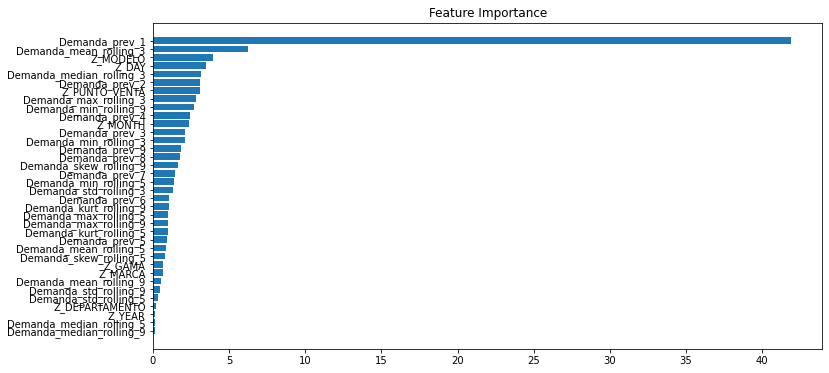

In [80]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')


Este modelo baseline del catboost nos permitió entender que el previo valor era muy importante, pero más que ello era también la demanda promedio de las ultimas 3 semanas. Además el modelo, que tiene influencia en el ID también era una variable importante. Sin embargo; no se obtuvo un resultado muy importante en el leaderboard, por lo que nos preguntamos que quizás debemos enfocar el problema de predecir la demanda nacional en primer lugar que por ID. Y esto funcionó! A continuación realizamos el modelado del forecasting de la Demanda Nacional Total con Prophet, un modelo del estado del arte de forecasting basado en transformadas de Fourier.

<h2>Forecasting de la Demanda con Prophet</h2>

In [79]:
train['ID'] = train['Z_MODELO'] + '|' + train['Z_PUNTO_VENTA'] + '|' + train['Z_GAMA']
test['ID'] = test['Z_MODELO'] + '|' + test['Z_PUNTO_VENTA'] + '|' + test['Z_GAMA']

In [80]:
test

Z_MARCA Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  \
0        MAR_5  GAM_3  MOD_318         DEP_12      PVENT_26  SEMANA_51   
1        MAR_3  GAM_1  MOD_305          DEP_1     PVENT_212  SEMANA_51   
2        MAR_5  GAM_3  MOD_246          DEP_1     PVENT_169  SEMANA_51   
3        MAR_1  GAM_4  MOD_286          DEP_1     PVENT_161  SEMANA_51   
4        MAR_6  GAM_4  MOD_282          DEP_1      PVENT_69  SEMANA_51   
...        ...    ...      ...            ...           ...        ...   
471725   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_175  SEMANA_60   
471726   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_217  SEMANA_60   
471727   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_353  SEMANA_60   
471728   MAR_2  GAM_1  MOD_196          DEP_8     PVENT_391  SEMANA_60   
471729   MAR_1  GAM_1   MOD_23         DEP_15     PVENT_465  SEMANA_60   

        Demanda Z_WEEK_DATE  Z_DAY  Z_MONTH  Z_YEAR                       ID  
0           NaN  2022-05-02      2        5    2022   MOD_318|PVENT_26|GAM_3  
1           NaN  2022-05-02      2        5    2022  MOD_305|PVENT_212|GAM_1  
2           NaN  2022-05-02      2        5    2022  MOD_246|PVENT_169|GAM_3  
3           NaN  2022-05-02      2        5    2022  MOD_286|PVENT_161|GAM_4  
4           NaN  2022-05-02      2        5    2022   MOD_282|PVENT_69|GAM_4  
...         ...         ...    ...      ...     ...                      ...  
471725      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_175|GAM_1  
471726      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_217|GAM_1  
471727      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_353|GAM_1  
471728      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_391|GAM_1  
471729      NaN  2022-07-04      4        7    2022   MOD_23|PVENT_465|GAM_1  

[471730 rows x 12 columns]

In [81]:
m = Prophet(interval_width=0.95,weekly_seasonality=False , daily_seasonality=True, yearly_seasonality=True)
m.fit(train[['Z_WEEK_DATE', 'Demanda']].groupby('Z_WEEK_DATE').sum().reset_index().rename(columns = {'Z_WEEK_DATE':'ds', 'Demanda':'y'}))
future = m.make_future_dataframe(periods=10, freq = 'W')
fcst = m.predict(future)

In [82]:
fcst

ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2021-05-17  2326.882717  32109.550300  39629.737744  2326.882717   
1  2021-05-24  2197.341098  32239.675889  39778.282119  2197.341098   
2  2021-05-31  2067.799479  33919.437032  40955.480225  2067.799479   
3  2021-06-07  1938.257860  35090.304744  42217.129634  1938.257860   
4  2021-06-14  1808.716241  35070.752811  42389.959762  1808.716241   
5  2021-06-21  1679.174621  35068.014676  42390.034475  1679.174621   
6  2021-06-28  1549.633002  36632.654150  43841.396344  1549.633002   
7  2021-07-05  1420.091383  39026.424882  46749.803788  1420.091383   
8  2021-07-12  1290.549764  41121.404310  48976.221568  1290.549764   
9  2021-07-19  1161.008145  40513.762805  48100.053373  1161.008145   
10 2021-07-26  1031.466526  38023.375603  45216.123619  1031.466526   
11 2021-08-02   901.924908  35223.982641  42420.114509   901.924908   
12 2021-08-09   772.383290  33343.532146  40667.057038   772.383290   
13 2021-08-16   642.841671  32206.875015  39173.586991   642.841671   
14 2021-08-23   513.300053  31069.088169  38648.682952   513.300053   
15 2021-08-30   383.758435  29743.664302  36804.513956   383.758435   
16 2021-09-06   254.216817  28954.686241  36677.851810   254.216817   
17 2021-09-13   124.675199  30117.160863  37328.589664   124.675199   
18 2021-09-20    -4.866420  31819.786116  39383.394762    -4.866420   
19 2021-09-27  -134.408038  33076.825795  40648.522664  -134.408038   
20 2021-10-04  -263.949656  33104.437301  40463.292378  -263.949656   
21 2021-10-11  -393.491274  32325.950481  39822.995049  -393.491274   
22 2021-10-18  -523.032893  32619.195946  39826.912250  -523.032893   
23 2021-10-25  -652.574510  33075.320655  40288.947919  -652.574510   
24 2021-11-01  -782.116128  34039.539971  41180.779694  -782.116128   
25 2021-11-08  -911.657746  35010.342086  42303.357385  -911.657746   
26 2021-11-15 -1041.199364  35643.010902  43055.486847 -1041.199364   
27 2021-11-22 -1170.740981  36819.169539  44175.033676 -1170.740981   
28 2021-11-29 -1300.282599  39159.693177  46367.381349 -1300.282599   
29 2021-12-06 -1429.824217  41495.993103  48257.943438 -1429.824217   
30 2021-12-13 -1559.365836  42259.151727  49760.898073 -1559.365836   
31 2021-12-20 -1688.907453  41277.228441  48688.770282 -1688.907453   
32 2021-12-27 -1818.449071  37454.962634  45042.583393 -1818.449071   
33 2022-01-03 -1947.990690  31944.091062  39227.400896 -1947.990690   
34 2022-01-10 -2077.532308  26706.351623  34196.571556 -2077.532308   
35 2022-01-17 -2207.073927  24773.891647  32040.781821 -2207.073927   
36 2022-01-24 -2336.615547  25823.910492  33444.381834 -2336.615547   
37 2022-01-31 -2466.157166  28803.022275  36150.765748 -2466.157166   
38 2022-02-07 -2595.698785  31037.476615  37967.310434 -2595.698785   
39 2022-02-14 -2725.240404  30311.866694  37825.460890 -2725.240404   
40 2022-02-21 -2854.782024  28341.631826  35763.713206 -2854.782024   
41 2022-02-28 -2984.323644  27317.954270  34396.801454 -2984.323644   
42 2022-03-07 -3113.865264  28748.176175  35516.100596 -3113.865264   
43 2022-03-14 -3243.406884  29880.349972  37525.983627 -3243.406884   
44 2022-03-21 -3372.948505  28869.049231  36435.482953 -3372.948505   
45 2022-03-28 -3502.490125  25029.971119  32394.242317 -3502.490125   
46 2022-04-04 -3632.031745  20672.619101  27831.570832 -3632.031745   
47 2022-04-11 -3761.573365  19275.203340  26719.222966 -3761.573365   
48 2022-04-18 -3891.114985  21743.728178  29540.652842 -3891.114985   
49 2022-04-25 -4020.656605  26114.180660  33365.534987 -4020.656605   
50 2022-05-01 -4131.692279  28035.950716  35141.743756 -4131.692290   
51 2022-05-08 -4261.233899  27419.236470  34646.891683 -4261.233933   
52 2022-05-15 -4390.775519  25526.903756  33163.816602 -4390.775579   
53 2022-05-22 -4520.317139  25048.441144  32480.927882 -4520.317231   
54 2022-05-29 -4649.858759  26532.298644  33548.363338 -4649.858884   
55 2022-06-05 -4779.400379  27869.1

In [84]:
train[['Z_WEEK_DATE', 'Demanda']].groupby('Z_WEEK_DATE').sum().reset_index().rename(columns = {'Z_WEEK_DATE':'ds', 'Demanda':'y'}) # Predicción de la demanda nacional total por semanas

ds      y
0   2021-05-17  35503
1   2021-05-24  36256
2   2021-05-31  37311
3   2021-06-07  38374
4   2021-06-14  38599
5   2021-06-21  40481
6   2021-06-28  38124
7   2021-07-05  42511
8   2021-07-12  47069
9   2021-07-19  45037
10  2021-07-26  37480
11  2021-08-02  40953
12  2021-08-09  38026
13  2021-08-16  35996
14  2021-08-23  33803
15  2021-08-30  31891
16  2021-09-06  34549
17  2021-09-13  34816
18  2021-09-20  34757
19  2021-09-27  36419
20  2021-10-04  35858
21  2021-10-11  37616
22  2021-10-18  37394
23  2021-10-25  35203
24  2021-11-01  36225
25  2021-11-08  40295
26  2021-11-15  40400
27  2021-11-22  40007
28  2021-11-29  42201
29  2021-12-06  43389
30  2021-12-13  47073
31  2021-12-20  48276
32  2021-12-27  36644
33  2022-01-03  36381
34  2022-01-10  31395
35  2022-01-17  29149
36  2022-01-24  28519
37  2022-01-31  32240
38  2022-02-07  35144
39  2022-02-14  33511
40  2022-02-21  32408
41  2022-02-28  31904
42  2022-03-07  30756
43  2022-03-14  35184
44  2022-03-21  30707
45  2022-03-28  29765
46  2022-04-04  26787
47  2022-04-11  16689
48  2022-04-18  30554
49  2022-04-25  28228

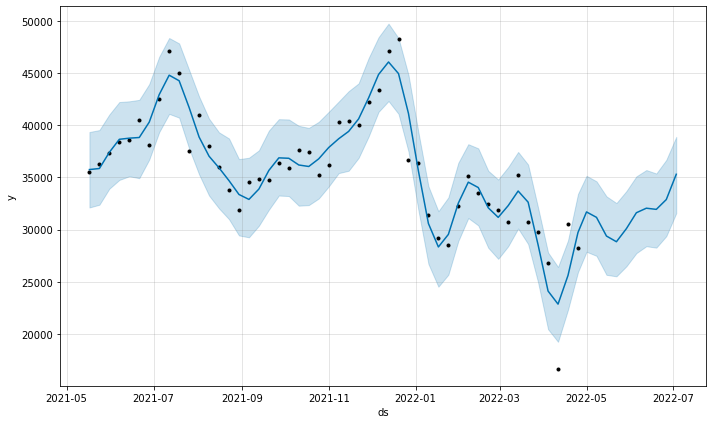

In [85]:
### Gráfico del modelo de Forecasting Demanda Nacional Total por Semana
### Los puntos negros son del training, y los semanas donde no las hay son las predichas.
fcst = m.predict(future)
fig = m.plot(fcst)

In [86]:
### Lo que hacemos a continuación es un baseline que gracias al entendimiento de variables importantes del catboost se implementará.
### Buscamos el ShareOfMarket de cada ID con respecto a la Demanda Nacional (DemandaID/DemandaNacional) por semana.
### A este ShareOfMarket semanal le llamaremos el nombre de "ratio"
### A continuación sacaremos el ratio prom de las ultimas 3 semanas para la última semana del periodo de análisis y se le aplicará con respecto a la Demanda Nacional Total

base = train[['ID', 'Demanda', 'Z_WEEK_DATE']].groupby(['ID', 'Z_WEEK_DATE']).sum().sort_values('Demanda' , ascending = [False]).reset_index()
base_cum = train[['Demanda', 'Z_WEEK_DATE']].groupby([ 'Z_WEEK_DATE']).sum().sort_values('Demanda' , ascending = [False]).reset_index()

pred = fcst[['ds', 'yhat']]
pred.columns = ['Z_WEEK_DATE', 'yhat']

base = base.merge(base_cum[['Z_WEEK_DATE', 'Demanda']].rename(columns = {'Demanda': 'Demanda_Total'}), on = 'Z_WEEK_DATE', how = "left")
base['ratio'] = base['Demanda']*100/base['Demanda_Total']

aux = base[base['Z_WEEK_DATE'] >= '2022-04-11'][['ID', 'ratio']].groupby('ID').mean().reset_index()

aux.sort_values('ratio', ascending = [False])

ID     ratio
13723     MOD_1|PVENT_1|GAM_1  1.031327
13834     MOD_1|PVENT_2|GAM_1  0.764974
14038     MOD_1|PVENT_4|GAM_1  0.467591
14060     MOD_1|PVENT_6|GAM_1  0.417956
14049     MOD_1|PVENT_5|GAM_1  0.401341
...                       ...       ...
19293  MOD_30|PVENT_135|GAM_1  0.000000
19294  MOD_30|PVENT_136|GAM_1  0.000000
19295  MOD_30|PVENT_137|GAM_1  0.000000
19296  MOD_30|PVENT_138|GAM_1  0.000000
47172     MOD_9|PVENT_9|GAM_1  0.000000

[47173 rows x 2 columns]

Por ejemplo el ID MOD_1|PVENT_1|GAM_1 es el que más ShareOfMarket tiene con respecto a todos. Casi el 1 % de la Demanda Nacional Total. Esto se asemejaría un poco al valor predicho por ID, ya que la proyección de la demanda nacional fue proyectada y solo aplicamos los ratios a estas semanas para hallar la demanda por ID.

In [87]:
base[(base['Z_WEEK_DATE'] >= '2022-04-11') & (base['ID'] == 'MOD_1|PVENT_1|GAM_1')][['Z_WEEK_DATE','ID', 'ratio']]

Z_WEEK_DATE                   ID     ratio
32   2022-04-18  MOD_1|PVENT_1|GAM_1  1.626628
278  2022-04-25  MOD_1|PVENT_1|GAM_1  0.772283
809  2022-04-11  MOD_1|PVENT_1|GAM_1  0.695069

In [88]:
base[(base['Z_WEEK_DATE'] >= '2022-04-11') & (base['ID'] == 'MOD_1|PVENT_2|GAM_1')][['Z_WEEK_DATE','ID', 'ratio']]

Z_WEEK_DATE                   ID     ratio
117   2022-04-18  MOD_1|PVENT_2|GAM_1  1.096419
316   2022-04-25  MOD_1|PVENT_2|GAM_1  0.719144
1469  2022-04-11  MOD_1|PVENT_2|GAM_1  0.479358

In [89]:
base[(base['Z_WEEK_DATE'] >= '2022-04-11') & (base['ID'] == 'MOD_1|PVENT_4|GAM_1')][['Z_WEEK_DATE','ID', 'ratio']]

Z_WEEK_DATE                   ID     ratio
409   2022-04-18  MOD_1|PVENT_4|GAM_1  0.559665
1147  2022-04-11  MOD_1|PVENT_4|GAM_1  0.563245
1493  2022-04-25  MOD_1|PVENT_4|GAM_1  0.279864

In [90]:
test['ID'] = test['Z_MODELO'] + '|' + test['Z_PUNTO_VENTA'] + '|' + test['Z_GAMA']

In [92]:
test = test.merge(aux, on='ID', how = "left") ### Hacemos merge a los ratios de los ID con el test.

In [93]:
pred_train = pred[pred['Z_WEEK_DATE'] < '2022-05-01']

In [94]:
pred_train['Z_WEEK_DATE'].unique()

array(['2021-05-17T00:00:00.000000000', '2021-05-24T00:00:00.000000000',
       '2021-05-31T00:00:00.000000000', '2021-06-07T00:00:00.000000000',
       '2021-06-14T00:00:00.000000000', '2021-06-21T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-07-05T00:00:00.000000000',
       '2021-07-12T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-08-02T00:00:00.000000000',
       '2021-08-09T00:00:00.000000000', '2021-08-16T00:00:00.000000000',
       '2021-08-23T00:00:00.000000000', '2021-08-30T00:00:00.000000000',
       '2021-09-06T00:00:00.000000000', '2021-09-13T00:00:00.000000000',
       '2021-09-20T00:00:00.000000000', '2021-09-27T00:00:00.000000000',
       '2021-10-04T00:00:00.000000000', '2021-10-11T00:00:00.000000000',
       '2021-10-18T00:00:00.000000000', '2021-10-25T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-11-08T00:00:00.000000000',
       '2021-11-15T00:00:00.000000000', '2021-11-22

In [95]:
pred_train['Z_WEEK_DATE'] = pred_train['Z_WEEK_DATE'].astype(str)
pred_train['Z_WEEK_DATE']

0     2021-05-17
1     2021-05-24
2     2021-05-31
3     2021-06-07
4     2021-06-14
5     2021-06-21
6     2021-06-28
7     2021-07-05
8     2021-07-12
9     2021-07-19
10    2021-07-26
11    2021-08-02
12    2021-08-09
13    2021-08-16
14    2021-08-23
15    2021-08-30
16    2021-09-06
17    2021-09-13
18    2021-09-20
19    2021-09-27
20    2021-10-04
21    2021-10-11
22    2021-10-18
23    2021-10-25
24    2021-11-01
25    2021-11-08
26    2021-11-15
27    2021-11-22
28    2021-11-29
29    2021-12-06
30    2021-12-13
31    2021-12-20
32    2021-12-27
33    2022-01-03
34    2022-01-10
35    2022-01-17
36    2022-01-24
37    2022-01-31
38    2022-02-07
39    2022-02-14
40    2022-02-21
41    2022-02-28
42    2022-03-07
43    2022-03-14
44    2022-03-21
45    2022-03-28
46    2022-04-04
47    2022-04-11
48    2022-04-18
49    2022-04-25
Name: Z_WEEK_DATE, dtype: object

In [96]:
train = train.merge(pred_train, on = 'Z_WEEK_DATE', how = "left")

In [98]:
train['yhat_fixed'] = train['yhat']
train

Z_MARCA Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  \
0         MAR_5  GAM_3  MOD_318         DEP_12      PVENT_26  SEMANA_01   
1         MAR_3  GAM_1  MOD_305          DEP_1     PVENT_212  SEMANA_01   
2         MAR_5  GAM_3  MOD_246          DEP_1     PVENT_169  SEMANA_01   
3         MAR_1  GAM_4  MOD_286          DEP_1     PVENT_161  SEMANA_01   
4         MAR_6  GAM_4  MOD_282          DEP_1      PVENT_69  SEMANA_01   
...         ...    ...      ...            ...           ...        ...   
2358645   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_175  SEMANA_50   
2358646   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_217  SEMANA_50   
2358647   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_353  SEMANA_50   
2358648   MAR_2  GAM_1  MOD_196          DEP_8     PVENT_391  SEMANA_50   
2358649   MAR_1  GAM_1   MOD_23         DEP_15     PVENT_465  SEMANA_50   

         Demanda Z_WEEK_DATE  Z_DAY  Z_MONTH  ...  Demanda_prev_2  \
0              0  2021-05-17     17        5  ...             NaN   
1              0  2021-05-17     17        5  ...             NaN   
2              1  2021-05-17     17        5  ...             NaN   
3              0  2021-05-17     17        5  ...             NaN   
4              0  2021-05-17     17        5  ...             NaN   
...          ...         ...    ...      ...  ...             ...   
2358645        0  2022-04-25     25        4  ...             0.0   
2358646        0  2022-04-25     25        4  ...             0.0   
2358647        0  2022-04-25     25        4  ...             0.0   
2358648        0  2022-04-25     25        4  ...             0.0   
2358649        0  2022-04-25     25        4  ...             0.0   

        Demanda_prev_3  Demanda_prev_4  Demanda_prev_5  Demanda_prev_6  \
0                  NaN             NaN             NaN             NaN   
1                  NaN             NaN             NaN             NaN   
2                  NaN             NaN             NaN             NaN   
3                  NaN             NaN             NaN             NaN   
4                  NaN             NaN             NaN             NaN   
...                ...             ...             ...             ...   
2358645            0.0             0.0             0.0             0.0   
2358646            0.0             0.0             0.0             0.0   
2358647            0.0             0.0             0.0             0.0   
2358648            0.0             0.0             0.0             0.0   
2358649            0.0             0.0             0.0             0.0   

         Demanda_prev_7  Demanda_prev_8  Demanda_prev_9          yhat  \
0                   NaN             NaN             NaN  35747.381976   
1                   NaN             NaN             NaN  35747.381976   
2                   NaN             NaN             NaN  35747.381976   
3                   NaN             NaN             NaN  35747.381976   
4                   NaN             NaN             NaN  35747.381976   
...                 ...             ...             ...           ...   
2358645             0.0             0.0             0.0  29720.385255   
2358646             0.0             0.0             0.0  29720.385255   
2358647             0.0             0.0             0.0  29720.385255   
2358648             0.0             0.0             0.0  29720.385255   
2358649             0.0             0.0             0.0  29720.385255   

           yhat_fixed  
0        35747.381976  
1        35747.381976  
2        35747.381976  
3        35747.381976  
4        35747.381976  
...               ...  
2358645  29720.385255  
2358646  29720.385255  
2358647  29720.385255  
2358648  29720.385255  
2358649  29720.385255  

[2358650 rows x 23 columns]

In [99]:
pred_test = pred[pred['Z_WEEK_DATE'] >= '2022-05-01']

In [100]:
pred_test['Z_WEEK_DATE'] = np.array(['2022-05-02', '2022-05-09', '2022-05-16', '2022-05-23', 
                                '2022-05-30', '2022-06-06', '2022-06-13', '2022-06-20',
                                '2022-06-27', '2022-07-04']) 

In [101]:
test = test.merge(pred_test, on = 'Z_WEEK_DATE', how = "left")

In [102]:
test

Z_MARCA Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  \
0        MAR_5  GAM_3  MOD_318         DEP_12      PVENT_26  SEMANA_51   
1        MAR_3  GAM_1  MOD_305          DEP_1     PVENT_212  SEMANA_51   
2        MAR_5  GAM_3  MOD_246          DEP_1     PVENT_169  SEMANA_51   
3        MAR_1  GAM_4  MOD_286          DEP_1     PVENT_161  SEMANA_51   
4        MAR_6  GAM_4  MOD_282          DEP_1      PVENT_69  SEMANA_51   
...        ...    ...      ...            ...           ...        ...   
471725   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_175  SEMANA_60   
471726   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_217  SEMANA_60   
471727   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_353  SEMANA_60   
471728   MAR_2  GAM_1  MOD_196          DEP_8     PVENT_391  SEMANA_60   
471729   MAR_1  GAM_1   MOD_23         DEP_15     PVENT_465  SEMANA_60   

        Demanda Z_WEEK_DATE  Z_DAY  Z_MONTH  Z_YEAR                       ID  \
0           NaN  2022-05-02      2        5    2022   MOD_318|PVENT_26|GAM_3   
1           NaN  2022-05-02      2        5    2022  MOD_305|PVENT_212|GAM_1   
2           NaN  2022-05-02      2        5    2022  MOD_246|PVENT_169|GAM_3   
3           NaN  2022-05-02      2        5    2022  MOD_286|PVENT_161|GAM_4   
4           NaN  2022-05-02      2        5    2022   MOD_282|PVENT_69|GAM_4   
...         ...         ...    ...      ...     ...                      ...   
471725      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_175|GAM_1   
471726      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_217|GAM_1   
471727      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_353|GAM_1   
471728      NaN  2022-07-04      4        7    2022  MOD_196|PVENT_391|GAM_1   
471729      NaN  2022-07-04      4        7    2022   MOD_23|PVENT_465|GAM_1   

        ratio          yhat  
0         0.0  31689.340921  
1         0.0  31689.340921  
2         0.0  31689.340921  
3         0.0  31689.340921  
4         0.0  31689.340921  
...       ...           ...  
471725    0.0  35296.725605  
471726    0.0  35296.725605  
471727    0.0  35296.725605  
471728    0.0  35296.725605  
471729    0.0  35296.725605  

[471730 rows x 14 columns]

In [103]:
test.loc[:,'Demanda'] = test['ratio']*test['yhat']/100

In [105]:
test['Z_WEEK_DATE'].unique()

array(['2022-05-02', '2022-05-09', '2022-05-16', '2022-05-23',
       '2022-05-30', '2022-06-06', '2022-06-13', '2022-06-20',
       '2022-06-27', '2022-07-04'], dtype=object)

In [106]:
### Así mismo aplicaremos penalidades cada 3 semanas que pasen. Debido a la coyuntura política nuestro forecasting inicial buscaba un repunte en julio, sin embargo 
### por temas económicos y políticos que vimos quizás fue afectado. Entonces aquí se puede manejar varias formar de aplicar escenarios optimistas, neutros o pesimistas de
### acuerdo a la coyuntura mundiall. Estas penalidades ayudaron con el pronóstico.

test.loc[test['Z_WEEK_DATE'] == '2022-05-02', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-05-02']['Demanda']*0.87 # Tope 0.87
test.loc[test['Z_WEEK_DATE'] == '2022-05-09', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-05-09']['Demanda']*0.87 # Tope 0.87
test.loc[test['Z_WEEK_DATE'] == '2022-05-16', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-05-16']['Demanda']*0.73 # Tope 0.73

test.loc[test['Z_WEEK_DATE'] == '2022-05-23', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-05-23']['Demanda']*0.65 # Tope 0.65
test.loc[test['Z_WEEK_DATE'] == '2022-05-30', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-05-30']['Demanda']*0.54 # Tope 0.55 posible 0.53
test.loc[test['Z_WEEK_DATE'] == '2022-06-06', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-06-06']['Demanda']*0.62 # Top 0.62 posible 0.64 
test.loc[test['Z_WEEK_DATE'] == '2022-06-13', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-06-13']['Demanda']*0.64 # Tope 0.64

test.loc[test['Z_WEEK_DATE'] == '2022-06-20', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-06-20']['Demanda']*0.67 # Tope 0.67
test.loc[test['Z_WEEK_DATE'] == '2022-06-27', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-06-27']['Demanda']*0.52 # Tope 0.52
test.loc[test['Z_WEEK_DATE'] == '2022-07-04', 'Demanda'] = test[test['Z_WEEK_DATE'] == '2022-07-04']['Demanda']*0.40 # Tope 0.40

test.loc[test['Z_WEEK_DATE'] == '2022-05-02', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-05-02']['yhat']*0.87 # Tope 0.87
test.loc[test['Z_WEEK_DATE'] == '2022-05-09', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-05-09']['yhat']*0.87 # Tope 0.87
test.loc[test['Z_WEEK_DATE'] == '2022-05-16', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-05-16']['yhat']*0.73 # Tope 0.73

test.loc[test['Z_WEEK_DATE'] == '2022-05-23', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-05-23']['yhat']*0.65 # 0.62
test.loc[test['Z_WEEK_DATE'] == '2022-05-30', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-05-30']['yhat']*0.54
test.loc[test['Z_WEEK_DATE'] == '2022-06-06', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-06-06']['yhat']*0.62
test.loc[test['Z_WEEK_DATE'] == '2022-06-13', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-06-13']['yhat']*0.64

test.loc[test['Z_WEEK_DATE'] == '2022-06-20', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-06-20']['yhat']*0.67 # Tope 0.67
test.loc[test['Z_WEEK_DATE'] == '2022-06-27', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-06-27']['yhat']*0.52 # Tope 0.52
test.loc[test['Z_WEEK_DATE'] == '2022-07-04', 'yhat_fixed'] = test[test['Z_WEEK_DATE'] == '2022-07-04']['yhat']*0.40 # Tope 0.40

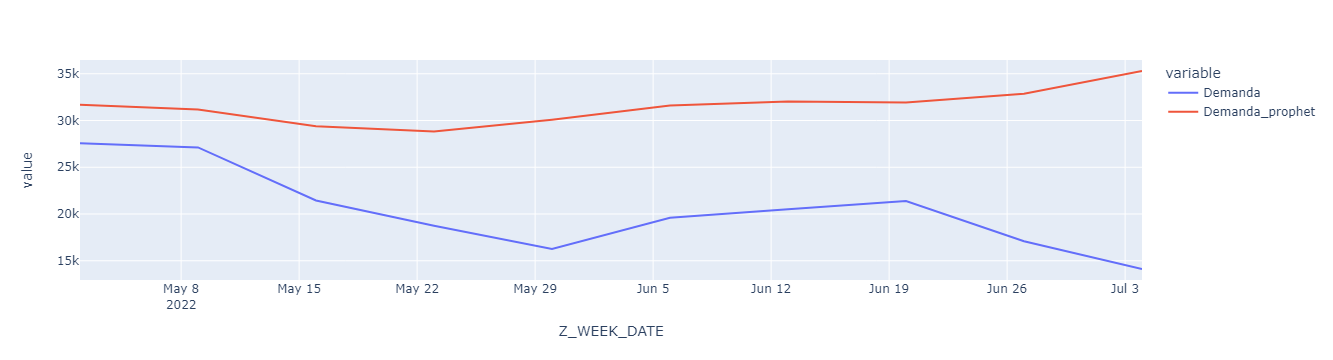

In [107]:
test['Demanda_tuned'] = test['Demanda']
test['Demanda_prophet'] = test['ratio']*test['yhat']/100 

test[['Z_WEEK_DATE', 'Demanda' , 'Demanda_prophet']].groupby(['Z_WEEK_DATE']).sum().reset_index()

graph = pd.melt(test[['Z_WEEK_DATE', 'Demanda' , 'Demanda_prophet']].groupby(['Z_WEEK_DATE']).sum().reset_index(), id_vars=['Z_WEEK_DATE'], value_vars=['Demanda', 'Demanda_prophet'],
)

fig = px.line(graph, x='Z_WEEK_DATE', y="value", color = 'variable')
fig.show()

Como se puede observar, las penalidades por incertidumbre castigaron la demanda nacional del prophet. Y creemos que este fue el posible resultado de demanda nacional en las semanas a predecir.

In [108]:
test['Demanda'].describe()

count    471730.000000
mean          0.432126
std           2.349517
min           0.000000
25%           0.000000
50%           0.000000
75%           0.201865
max         284.333916
Name: Demanda, dtype: float64

<h2>Ensemble de Modelos de Ratios</h2>

In [110]:
### Si bien es cierto los ratios promedio ult 3 semanas funcionó muy bien para posicionarnos con 2.04 en el public leaderboard. Se buscó ensembles 
### con otros ratios, el que nos funcionó bastante bien y tiene mucho sentido es el ratio de la última semana. 
### Realizar un ensemble con estos ratios*Demanda Proyectada Prophet y ratios_avg_ult_3_sem*Demanda Proyectada Prophet funcionó muy bien.

aux_last_trx_app = base[base['Z_WEEK_DATE'] == '2022-04-25'][['ID', 'ratio']].groupby('ID').mean().reset_index()
aux_last_trx_app.rename(columns = {'ratio':'ratio_last_trx_app'}, inplace = True)
aux_last_trx_app.sort_values('ratio_last_trx_app', ascending = [False])

ID  ratio_last_trx_app
13723     MOD_1|PVENT_1|GAM_1            0.772283
13834     MOD_1|PVENT_2|GAM_1            0.719144
12718    MOD_18|PVENT_1|GAM_2            0.605781
14783    MOD_21|PVENT_1|GAM_1            0.442823
28169     MOD_4|PVENT_1|GAM_1            0.435738
...                       ...                 ...
17769   MOD_27|PVENT_37|GAM_1            0.000000
17770  MOD_27|PVENT_380|GAM_1            0.000000
17771  MOD_27|PVENT_381|GAM_1            0.000000
17772  MOD_27|PVENT_382|GAM_1            0.000000
47172     MOD_9|PVENT_9|GAM_1            0.000000

[47173 rows x 2 columns]

In [111]:
test_ratio_merged = test.copy()

In [112]:
test_ratio_merged = test_ratio_merged.merge(aux_last_trx_app, on='ID', how = "left")

In [113]:
test_ratio_merged.loc[:,'Demanda_last_trx_app'] = test_ratio_merged['ratio_last_trx_app']*test['yhat']/100

In [114]:
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-02', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-02']['Demanda_last_trx_app']*0.87 # Tope 0.87
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-09', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-09']['Demanda_last_trx_app']*0.87 # Tope 0.87
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-16', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-16']['Demanda_last_trx_app']*0.73 # Tope 0.73

test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-23', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-23']['Demanda_last_trx_app']*0.65 # Tope 0.65
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-30', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-30']['Demanda_last_trx_app']*0.54 # Tope 0.55 posible 0.53
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-06', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-06']['Demanda_last_trx_app']*0.62 # Top 0.62 posible 0.64 
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-13', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-13']['Demanda_last_trx_app']*0.64 # Tope 0.64

test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-20', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-20']['Demanda_last_trx_app']*0.67 # Tope 0.67
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-27', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-27']['Demanda_last_trx_app']*0.52 # Tope 0.52
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-07-04', 'Demanda_last_trx_app'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-07-04']['Demanda_last_trx_app']*0.40 # Tope 0.40

In [115]:
test_ratio_merged['Demanda'].describe()

count    471730.000000
mean          0.432126
std           2.349517
min           0.000000
25%           0.000000
50%           0.000000
75%           0.201865
max         284.333916
Name: Demanda, dtype: float64

In [116]:
test_ratio_merged['Demanda_last_trx_app'].describe()

count    471730.000000
mean          0.432126
std           2.503216
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         212.916268
Name: Demanda_last_trx_app, dtype: float64

In [117]:
### También ayudó los ratios de la penúltima semana. No con la misma intensidad de la última pero si permite suavizar algún efecto de canibalización y cambios en el ShareOfMarket de 
### un ID.

aux_pult_trx = base[base['Z_WEEK_DATE'] == '2022-04-18'].sort_values('ratio', ascending = [False])[['ID', 'ratio']]
aux_pult_trx.rename(columns = {'ratio': 'ratio_pult_trx'}, inplace = True)

In [118]:
test_ratio_merged = test_ratio_merged.merge(aux_pult_trx, on='ID', how = "left")

In [119]:
test_ratio_merged

Z_MARCA Z_GAMA Z_MODELO Z_DEPARTAMENTO Z_PUNTO_VENTA     Z_WEEK  \
0        MAR_5  GAM_3  MOD_318         DEP_12      PVENT_26  SEMANA_51   
1        MAR_3  GAM_1  MOD_305          DEP_1     PVENT_212  SEMANA_51   
2        MAR_5  GAM_3  MOD_246          DEP_1     PVENT_169  SEMANA_51   
3        MAR_1  GAM_4  MOD_286          DEP_1     PVENT_161  SEMANA_51   
4        MAR_6  GAM_4  MOD_282          DEP_1      PVENT_69  SEMANA_51   
...        ...    ...      ...            ...           ...        ...   
471725   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_175  SEMANA_60   
471726   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_217  SEMANA_60   
471727   MAR_2  GAM_1  MOD_196          DEP_1     PVENT_353  SEMANA_60   
471728   MAR_2  GAM_1  MOD_196          DEP_8     PVENT_391  SEMANA_60   
471729   MAR_1  GAM_1   MOD_23         DEP_15     PVENT_465  SEMANA_60   

        Demanda Z_WEEK_DATE  Z_DAY  Z_MONTH  Z_YEAR                       ID  \
0           0.0  2022-05-02      2        5    2022   MOD_318|PVENT_26|GAM_3   
1           0.0  2022-05-02      2        5    2022  MOD_305|PVENT_212|GAM_1   
2           0.0  2022-05-02      2        5    2022  MOD_246|PVENT_169|GAM_3   
3           0.0  2022-05-02      2        5    2022  MOD_286|PVENT_161|GAM_4   
4           0.0  2022-05-02      2        5    2022   MOD_282|PVENT_69|GAM_4   
...         ...         ...    ...      ...     ...                      ...   
471725      0.0  2022-07-04      4        7    2022  MOD_196|PVENT_175|GAM_1   
471726      0.0  2022-07-04      4        7    2022  MOD_196|PVENT_217|GAM_1   
471727      0.0  2022-07-04      4        7    2022  MOD_196|PVENT_353|GAM_1   
471728      0.0  2022-07-04      4        7    2022  MOD_196|PVENT_391|GAM_1   
471729      0.0  2022-07-04      4        7    2022   MOD_23|PVENT_465|GAM_1   

        ratio          yhat    yhat_fixed  Demanda_tuned  Demanda_prophet  \
0         0.0  31689.340921  27569.726601            0.0              0.0   
1         0.0  31689.340921  27569.726601            0.0              0.0   
2         0.0  31689.340921  27569.726601            0.0              0.0   
3         0.0  31689.340921  27569.726601            0.0              0.0   
4         0.0  31689.340921  27569.726601            0.0              0.0   
...       ...           ...           ...            ...              ...   
471725    0.0  35296.725605  14118.690242            0.0              0.0   
471726    0.0  35296.725605  14118.690242            0.0              0.0   
471727    0.0  35296.725605  14118.690242            0.0              0.0   
471728    0.0  35296.725605  14118.690242            0.0              0.0   
471729    0.0  35296.725605  14118.690242            0.0              0.0   

        ratio_last_trx_app  Demanda_last_trx_app  ratio_pult_trx  
0                      0.0                   0.0             0.0  
1                      0.0                   0.0             0.0  
2                      0.0                   0.0             0.0  
3                      0.0                   0.0             0.0  
4                      0.0                   0.0             0.0  
...                    ...                   ...             ...  
471725                 0.0                   0.0             0.0  
471726                 0.0                   0.0             0.0  
471727                 0.0                   0.0             0.0  
471728                 0.0                   0.0             0.0  
471729                 0.0                   0.0             0.0  

[471730 rows x 20 columns]

In [120]:
test_ratio_merged.loc[:,'Demanda_pult_trx'] = test_ratio_merged['ratio_pult_trx']*test['yhat']/100

In [121]:
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-02', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-02']['Demanda_pult_trx']*0.87 # Tope 0.87
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-09', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-09']['Demanda_pult_trx']*0.87 # Tope 0.87
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-16', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-16']['Demanda_pult_trx']*0.73 # Tope 0.73

test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-23', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-23']['Demanda_pult_trx']*0.65 # Tope 0.65
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-30', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-05-30']['Demanda_pult_trx']*0.54 # Tope 0.55 posible 0.53
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-06', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-06']['Demanda_pult_trx']*0.62 # Top 0.62 posible 0.64 
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-13', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-13']['Demanda_pult_trx']*0.64 # Tope 0.64

test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-20', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-20']['Demanda_pult_trx']*0.67 # Tope 0.67
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-27', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-06-27']['Demanda_pult_trx']*0.52 # Tope 0.52
test_ratio_merged.loc[test_ratio_merged['Z_WEEK_DATE'] == '2022-07-04', 'Demanda_pult_trx'] = test_ratio_merged[test_ratio_merged['Z_WEEK_DATE'] == '2022-07-04']['Demanda_pult_trx']*0.40 # Tope 0.40

In [122]:
test_ratio_merged['Demanda'].describe() #2.000 test_ratio_merged['Demanda']*0.65 + 0.30*test_ratio_merged['Demanda_last_trx_app']

count    471730.000000
mean          0.432126
std           2.349517
min           0.000000
25%           0.000000
50%           0.000000
75%           0.201865
max         284.333916
Name: Demanda, dtype: float64

In [123]:
### A continuación un análisis de las demandas ensambladas con esta metodología

<h3>Ensemble con los ratios de la última semana</h3>

In [134]:
test_ratio_merged['Demanda_50_50'] = test_ratio_merged['Demanda']*0.50 + 0.50*test_ratio_merged['Demanda_last_trx_app']

In [135]:
test_ratio_merged['Demanda_50_50'].describe() #1.97579 test_ratio_merged['Demanda']*0.50 + 0.50*test_ratio_merged['Demanda_last_trx_app']

count    471730.000000
mean          0.432126
std           2.378891
min           0.000000
25%           0.000000
50%           0.000000
75%           0.111880
max         248.625092
Name: Demanda_50_50, dtype: float64

In [136]:
test_ratio_merged['Demanda_60_40'] = test_ratio_merged['Demanda']*0.60 + 0.40*test_ratio_merged['Demanda_last_trx_app']

In [137]:
test_ratio_merged['Demanda_60_40'].describe() #1.97136 test_ratio_merged['Demanda']*0.60 + 0.40*test_ratio_merged['Demanda_last_trx_app']

count    471730.000000
mean          0.432126
std           2.365142
min           0.000000
25%           0.000000
50%           0.000000
75%           0.134256
max         255.766857
Name: Demanda_60_40, dtype: float64

In [138]:
test_ratio_merged['Demanda_65_35'] = test_ratio_merged['Demanda']*0.65 + 0.35*test_ratio_merged['Demanda_last_trx_app']

In [139]:
test_ratio_merged['Demanda_65_35'].describe() #1.97090   test_ratio_merged['Demanda']*0.65 + 0.35*test_ratio_merged['Demanda_last_trx_app']. Este funcionó muy bien.

count    471730.000000
mean          0.432126
std           2.359726
min           0.000000
25%           0.000000
50%           0.000000
75%           0.145444
max         259.337739
Name: Demanda_65_35, dtype: float64

<h3>Ensemble con los ratios de la penúltima semana</h3>

In [140]:
test_ratio_merged['Demanda_65_35__0972_0028'] = test_ratio_merged['Demanda_65_35']*0.972 + 0.028*test_ratio_merged['Demanda_pult_trx'] 

In [141]:
test_ratio_merged['Demanda_65_35__0972_0028'].describe()

count    471730.000000
mean          0.432126
std           2.370711
min           0.000000
25%           0.000000
50%           0.000000
75%           0.160167
max         264.633077
Name: Demanda_65_35__0972_0028, dtype: float64

In [142]:
test_ratio_merged['Demanda_65_35__0945_0055'] = test_ratio_merged['Demanda_65_35']*0.945 + 0.055*test_ratio_merged['Demanda_pult_trx']

In [143]:
test_ratio_merged['Demanda_65_35__0945_0055'].describe()

count    471730.000000
mean          0.432126
std           2.381656
min           0.000000
25%           0.000000
50%           0.000000
75%           0.173216
max         269.739296
Name: Demanda_65_35__0945_0055, dtype: float64

In [144]:
test_ratio_merged['Demanda_65_35__090_01'] = test_ratio_merged['Demanda_65_35']*0.90 + 0.1*test_ratio_merged['Demanda_pult_trx']

In [145]:
test_ratio_merged['Demanda_65_35__090_01'].describe()

count    471730.000000
mean          0.432126
std           2.400650
min           0.000000
25%           0.000000
50%           0.000000
75%           0.189237
max         278.249662
Name: Demanda_65_35__090_01, dtype: float64

In [146]:
test_ratio_merged['Demanda_65_35__080_020'] = test_ratio_merged['Demanda_65_35']*0.80 + 0.20*test_ratio_merged['Demanda_pult_trx']

In [147]:
test_ratio_merged['Demanda_65_35__080_020'].describe()

count    471730.000000
mean          0.432126
std           2.446131
min           0.000000
25%           0.000000
50%           0.000000
75%           0.198534
max         297.161584
Name: Demanda_65_35__080_020, dtype: float64

In [150]:
test_ratio_merged['Demanda_65_35__085_015'] = test_ratio_merged['Demanda_65_35']*0.85 + 0.15*test_ratio_merged['Demanda_pult_trx'] #Este ensemble funcionó muy bien.

In [151]:
test_ratio_merged['Demanda_65_35__085_015'].describe()

count    471730.000000
mean          0.432126
std           2.422836
min           0.000000
25%           0.000000
50%           0.000000
75%           0.188644
max         287.705623
Name: Demanda_65_35__085_015, dtype: float64

In [152]:
test_ratio_merged['Demanda'] = test_ratio_merged['Demanda_65_35__085_015'] 
# Se lo pasamos al valor de la demanda. Si bien es cierto ya se logró realizar un buen resultado
# con posiblemente realizando un buen forecasting de la demanda nacional, pero falta mejorar por ID.
# El resultado de estos ensembles será usado como Stacking en un XGBoost.

In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(test_ratio_merged['Demanda_65_35'], test_ratio_merged['Demanda_last_trx_app'])) 

0.6289079424784604

In [154]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(test_ratio_merged['Demanda_65_35'], test_ratio_merged['Demanda'])) 

0.16977072672537885

<h3>Output del Ensemble Modeing Prophet con Ratios Avg Ult 3 Semanas, Ratios Ult Semana, y Ratios Penultima Semana</h3>

In [156]:
submit = test_ratio_merged.copy()
reverse_mapping_file = '../utils/reverse_dict_mapping_list.txt'

with open(reverse_mapping_file, 'rb') as f:
    reverse_mapping = pickle.load( f)

i=0
for column in descriptive_columns:
    submit[column] = submit[column].map(reverse_mapping[i])
    i+=1
    
submit['ID'] = submit['Z_MODELO'] + '|' + submit['Z_PUNTO_VENTA'] + '|' + submit['Z_GAMA'] + '|' + submit['Z_WEEK']
submission = submit[['ID','Demanda']].groupby('ID').sum().reset_index()
submission[['ID', 'Demanda']].to_csv('../Results/Submission_73.csv', index = False, sep = ',')